<a href="https://colab.research.google.com/github/aruanalucena/todo/blob/master/Modelagem_Regress%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise exploratória de dados

Dependendo do objetivo podemos ter mais ou menos etapas. Vamos escolher um desafio mais dificil para cobrir a maioria das possibilidades de modelagem.

No nosso exemplo vamos modelar uma regressão para explicar os preços das casas nos EUA e usa-lo para escolher as casas desvalorizadas.

    -> Identificar como a base foi construida
    -> Quais foram as regras, essas regras influeciam os dados?
    -> Devemos nos preocupar os com outliers?
    -> Ao analisar como as variáveis estão distribuidas, temos funções conhecidas?
    -> Como as funções se correlacionam, os comportamentos são os previstos?
    -> Para estudar a correlação parcial com regressões precisamos mudar a forma dos dados?
    -> Transformações logaritmicas
    -> Variáveis dummies, quando usa-las
    -> Mudando a forma funcional com polinomios
    -> Iterando váriaveis
    -> Gerando predições

<br>
<img src="img/house_price.png" width="950" />
<br>

Vamos modelar uma regressão multipla para entender como diferentes variáveis afetam os preços de casas nos EUA.

Features:
- **price** - The last price the house was sold for
- **num_bed** - The number of bedrooms
- **num_bath** - The number of bathrooms (fractions mean the house has a toilet-only or shower/bathtub-only bathroom)
- **size_house** (includes basement) - The size of the house
- **size_lot** - The size of the lot
- **num_floors** - The number of floors
- **is_waterfront** - Whether or not the house is a waterfront house (0 means it is not a waterfront house whereas 1 means that it is a waterfront house)
- **condition** - How worn out the house is. Ranges from 1 (needs repairs all over the place) to 5 (the house is very well maintained)
- **size_basement** - The size of the basement
- **year_built** - The year the house was built
- **renovation_date** - The year the house was renovated for the last time. 0 means the house has never been renovated
- **zip** - The zip code
- **latitude** - Latitude
- **longitude** - Longitude
- **avg_size_neighbor_houses** - The average house size of the neighbors
- **avg_size_neighbor_lot** - The average lot size of the neighbors

Dados originais disponíveis no Kaggle [clicando aqui](https://www.kaggle.com/harlfoxem/housesalesprediction)

# Importando os principais pacotes

In [ ]:
# Importando as bibliotecas necessárias
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import sqlite3

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
#%config InlineBackend.figure_formats=['svg']

# Criando a conexão com o banco de dados

In [ ]:
# Lendo o qrquivo e armazenando os dados como um DataFrame com SQL

db = sqlite3.connect(r'../../99 Datasets/datasets.db')
query = 'SELECT * FROM house_sales'

df = pd.read_sql_query(query, db)

# Primeira olhada nas informações e estatísticas descritivas dos dados

In [ ]:
# Verificando as informações básicas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18448 entries, 0 to 18447
Data columns (total 17 columns):
rowid                       18448 non-null int64
price                       18448 non-null int64
num_bed                     18448 non-null int64
num_bath                    18448 non-null float64
size_house                  18448 non-null int64
size_lot                    18448 non-null int64
num_floors                  18448 non-null float64
is_waterfront               18448 non-null int64
condition                   18448 non-null int64
size_basement               18448 non-null int64
year_built                  18448 non-null int64
renovation_date             18448 non-null int64
zip                         18448 non-null int64
latitude                    18448 non-null float64
longitude                   18448 non-null float64
avg_size_neighbor_houses    18448 non-null int64
avg_size_neighbor_lot       18448 non-null int64
dtypes: float64(4), int64(13)
memory usage: 2.4 MB

In [ ]:
# Primeiras estatísticas descrivas
df.describe()

,rowid,price,num_bed,num_bath,size_house,size_lot,num_floors,is_waterfront,condition,size_basement,year_built,renovation_date,zip,latitude,longitude,avg_size_neighbor_houses,avg_size_neighbor_lot
count,18448.000000,1.844800e+04,18448.000000,18448.000000,18448.000000,1.844800e+04,18448.000000,18448.000000,18448.000000,18448.000000,18448.000000,18448.000000,18448.000000,18448.000000,18448.000000,18448.000000,18448.000000
mean,9223.500000,5.423624e+05,3.372615,2.118888,2083.940915,1.503602e+04,1.494606,0.007643,3.411698,293.571498,1971.001138,85.145002,98077.921455,47.560030,-122.214419,1988.306483,12571.596216
std,5325.623219,3.720135e+05,0.933892,0.772384,921.416218,4.181455e+04,0.540806,0.087092,0.652593,443.607503,29.361619,403.371263,53.497440,0.138557,0.139910,686.173124,26329.260211
min,0.000000,7.800000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,1.000000,0.000000,1900.000000,0.000000,98001.000000,47.155933,-122.518648,399.000000,651.000000
25%,4611.750000,3.218375e+05,3.000000,1.750000,1430.000000,5.050000e+03,1.000000,0.000000,3.000000,0.000000,1952.000000,0.000000,98033.000000,47.471527,-122.328084,1490.000000,5100.000000
50%,9223.500000,4.500000e+05,3.000000,2.250000,1920.000000,7.600500e+03,1.500000,0.000000,3.000000,0.000000,1975.000000,0.000000,98065.000000,47.571599,-122.230688,1840.000000,7611.000000
75%,13835.250000,6.480000e+05,4.000000,2.500000,2560.000000,1.062525e+04,2.000000,0.000000,4.000000,570.000000,1997.000000,0.000000,98118.000000,47.677918,-122.125733,2370.000000,10050.000000
max,18447.000000,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,5.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777624,-121.315254,6110.000000,858132.000000


# Explorando a correlação entre as variáveis

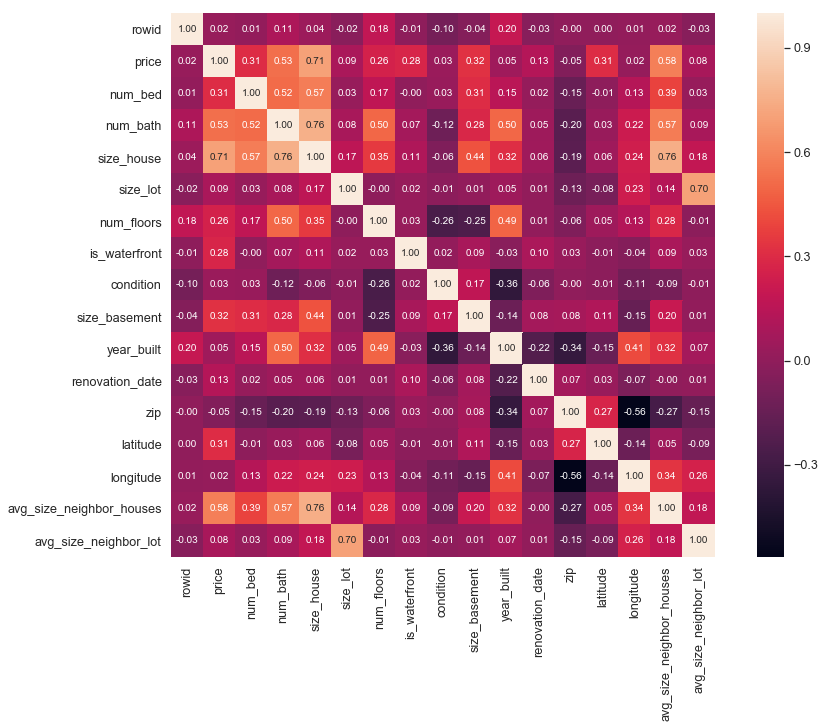

In [ ]:
# Plotando um mapa de calor das correlações com todas as variáveis

corrmat = df.corr()
cols = corrmat.nlargest(10, 'price')['price'].index
cm = np.corrcoef(corrmat.values.T)
sns.set(font_scale=1.15)
f, ax = plt.subplots(figsize=(15, 10))
hm = sns.heatmap(corrmat, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=corrmat.columns, xticklabels=corrmat.columns)

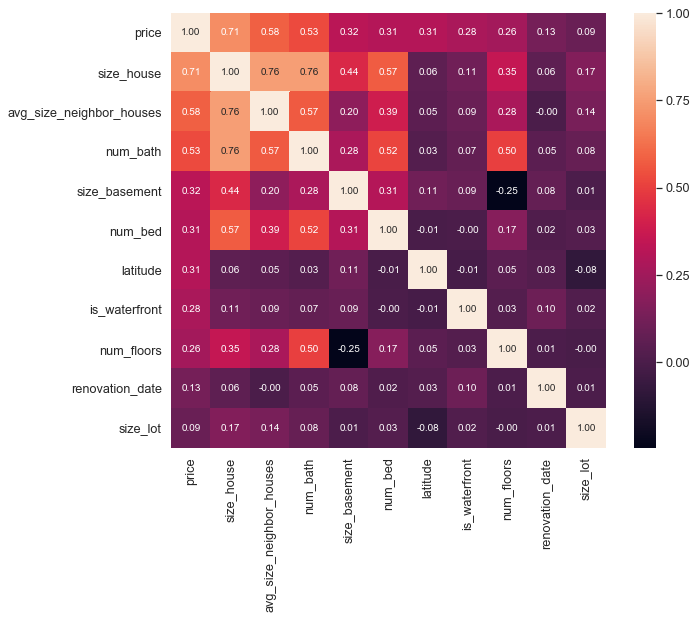

In [ ]:
# Identificando as 10 variáveis que mais estão mais correlacionadas com o PRICE
# Plotando um mapa de calor com as 10 variáveis mais correlacionadas

corrmat = df.corr()
cols = corrmat.nlargest(11, 'price')['price'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.15)
f, ax = plt.subplots(figsize=(10, 8))
hm = sns.heatmap(cm, 
                 cbar=True, 
                 annot=True, 
                 square=True, 
                 fmt='.2f', 
                 annot_kws={'size': 10}, 
                 yticklabels=cols.values, 
                 xticklabels=cols.values)

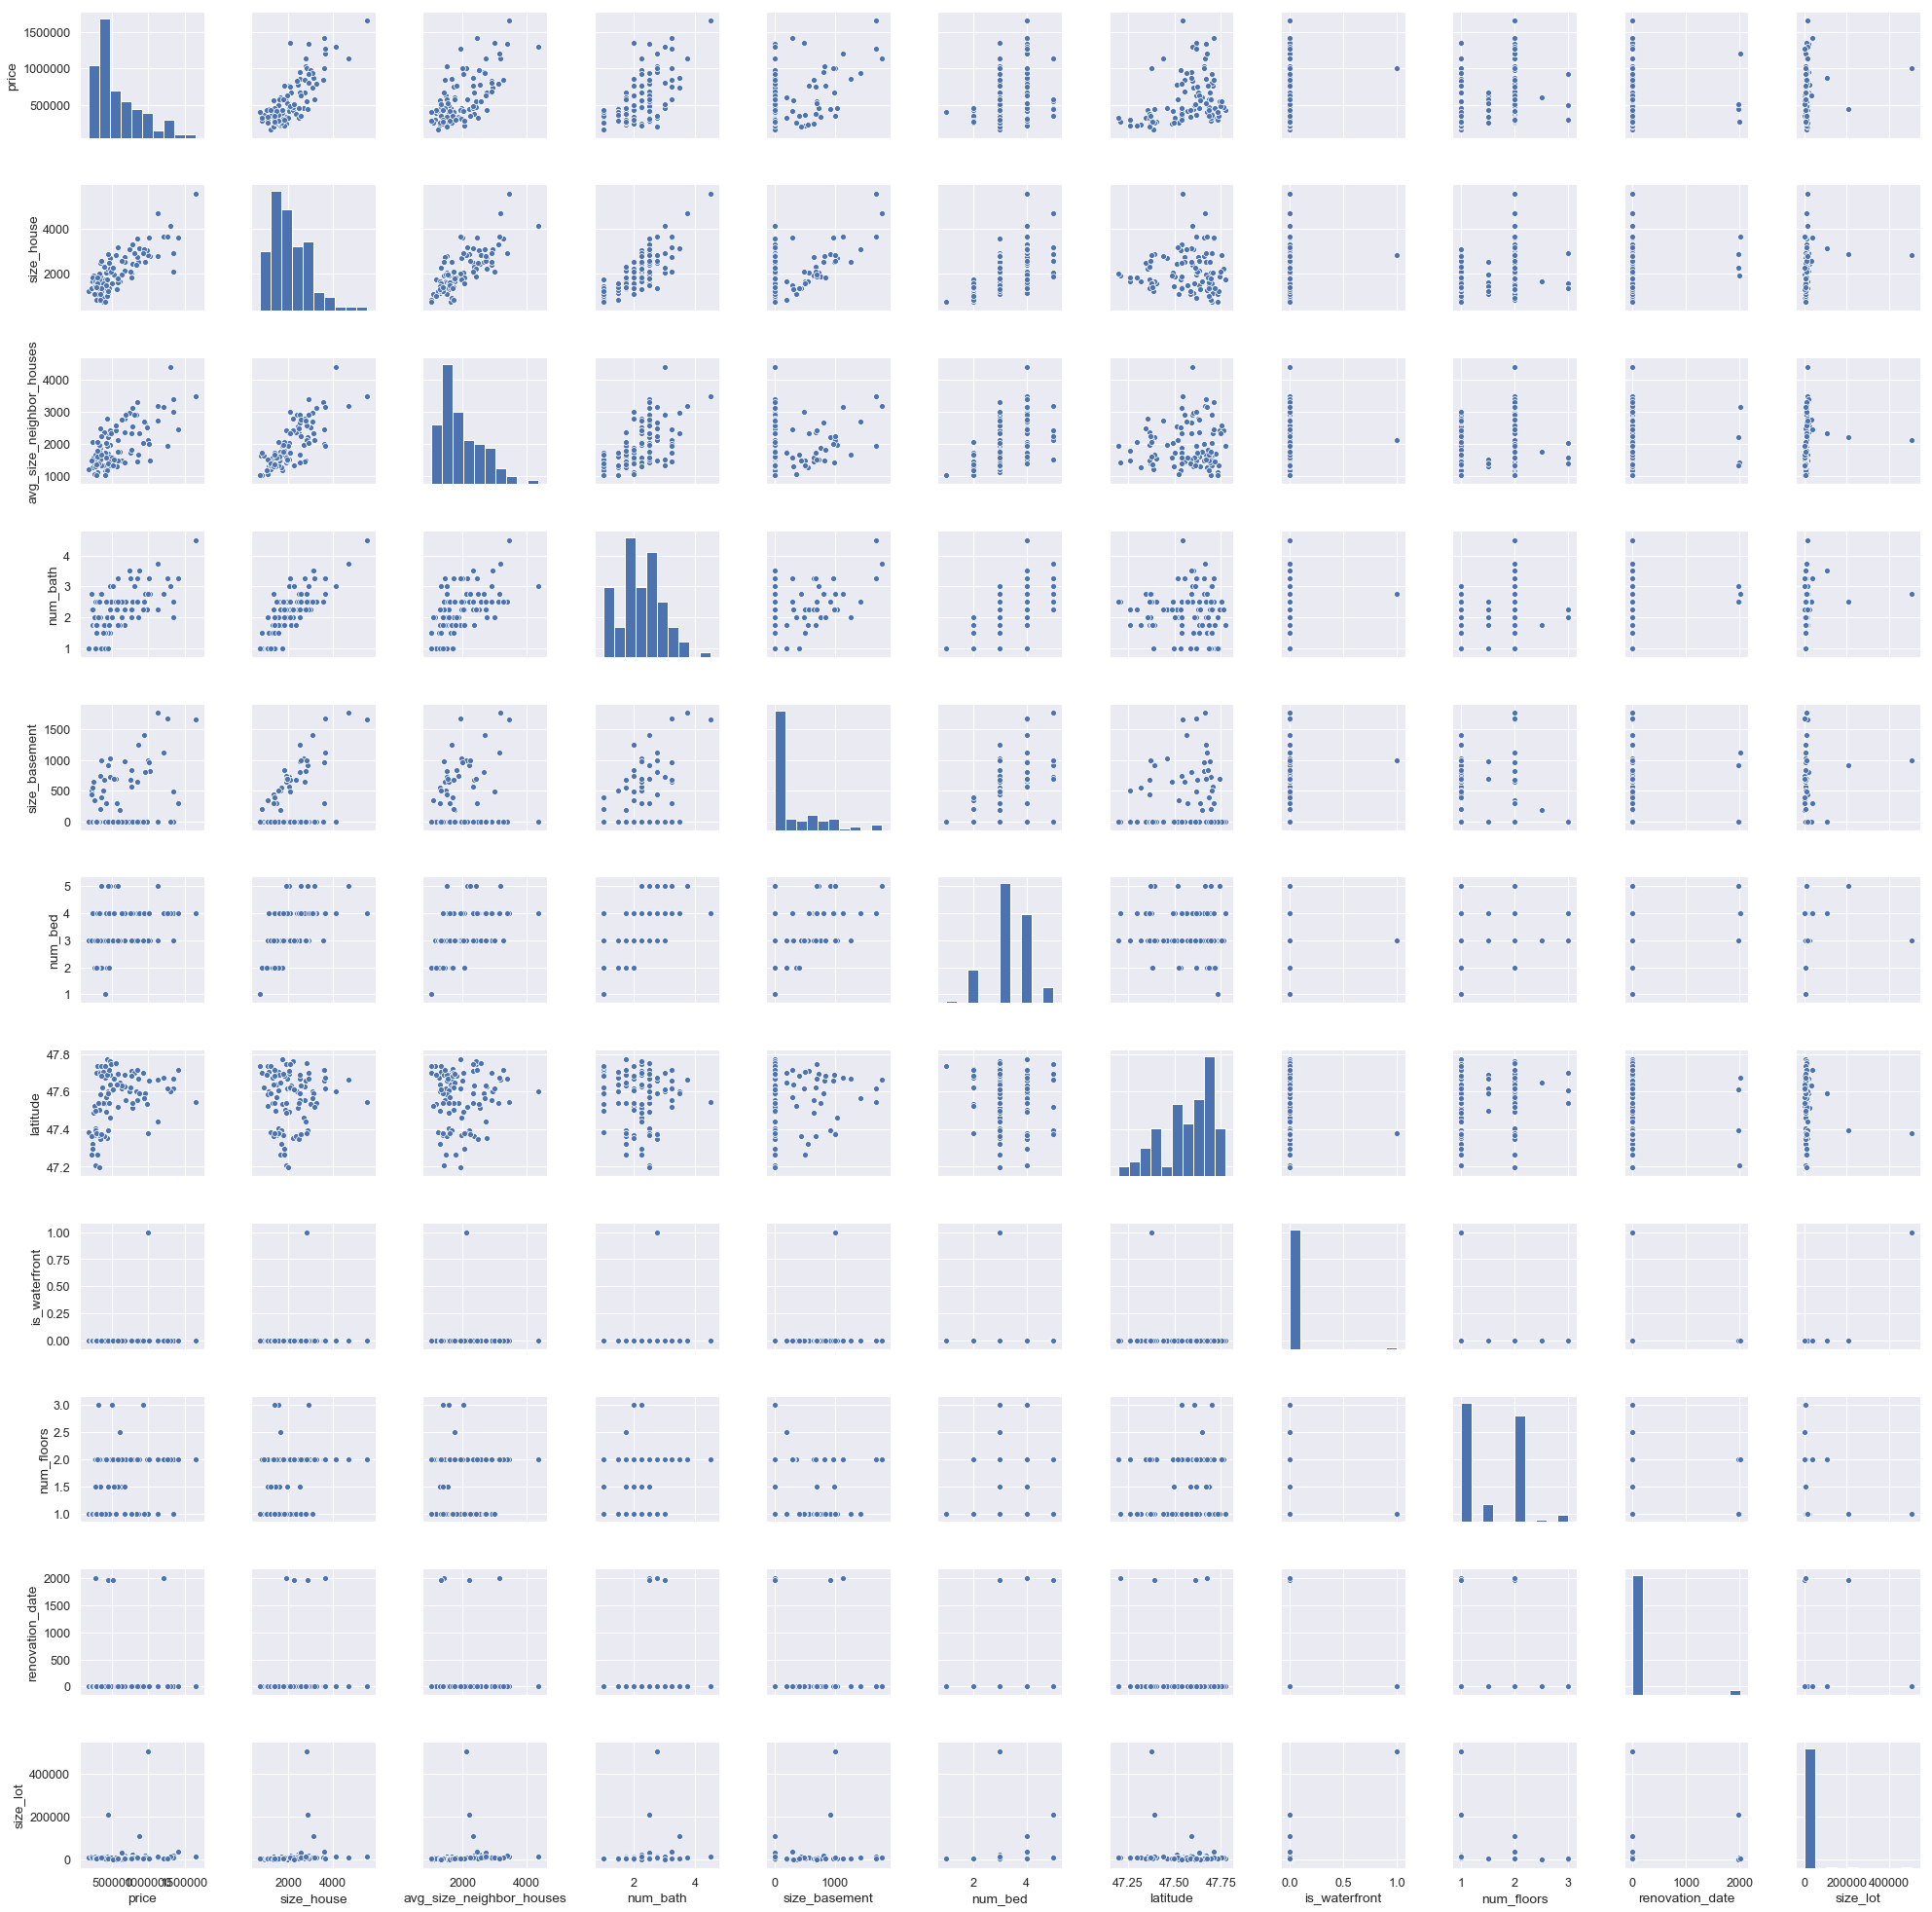

In [ ]:
# Plotando o PAIPLOT para as variáveis mais correlacionadas com um sample (100 amostras)
sample = df[cols].sample(100)
sns.pairplot(sample)

## Imagem do mapa da região com as casas mais caras em cor mais escura

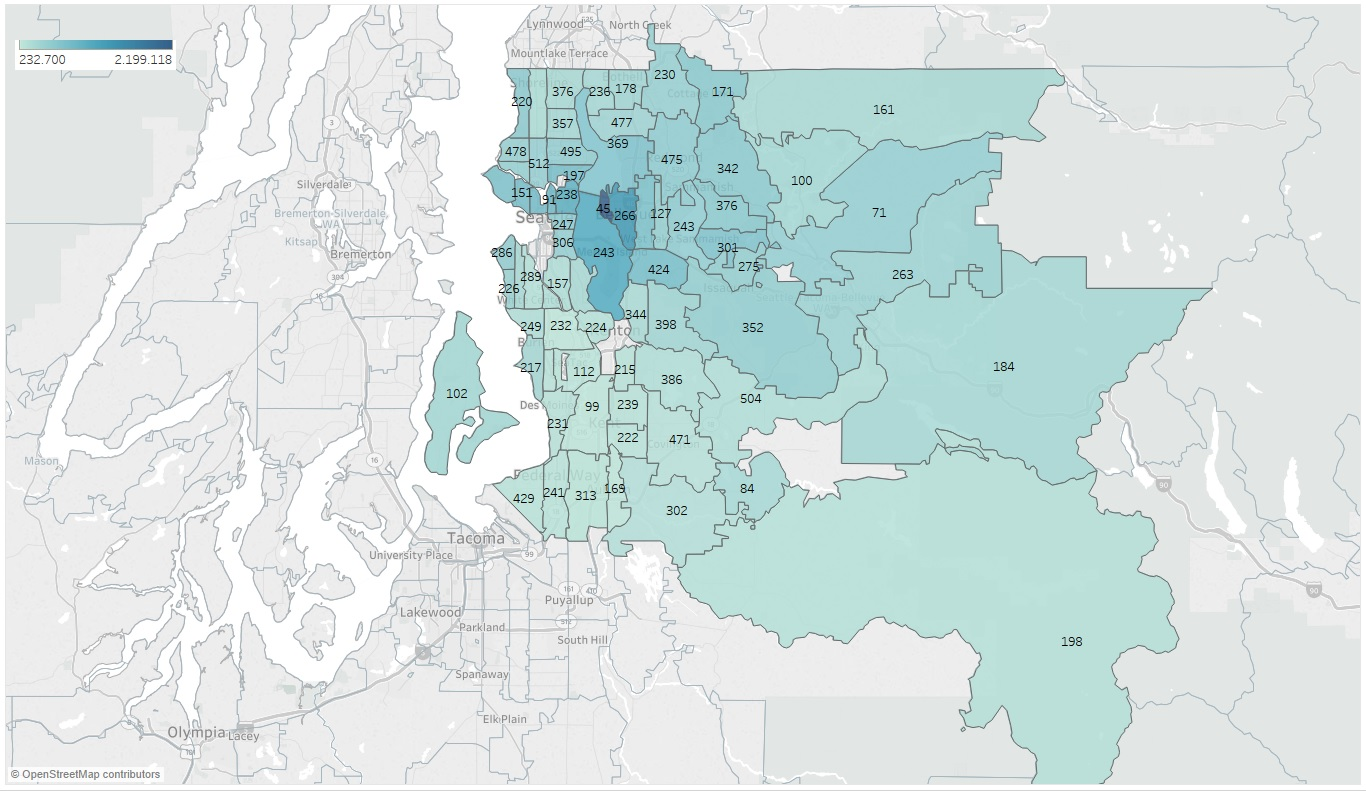

In [ ]:
# Plotando a imagem da região onde se localizam as casas do DataSet
from IPython.display import Image
Image(filename=r'img\houses_tableau.jpg')

# Primeiro modelo de regressão para usarmos de benchmark para os próximos 

In [ ]:
# Listando todas as colunas com os dados
list(df.columns)

['rowid',
 'price',
 'num_bed',
 'num_bath',
 'size_house',
 'size_lot',
 'num_floors',
 'is_waterfront',
 'condition',
 'size_basement',
 'year_built',
 'renovation_date',
 'zip',
 'latitude',
 'longitude',
 'avg_size_neighbor_houses',
 'avg_size_neighbor_lot']

In [ ]:
# Rodando a primeira regressão múltipla como benchmark

# Definindo a função da regressão
function1 = '''
price ~
+ num_bed
+ num_bath
+ size_house
+ size_lot
+ num_floors
+ is_waterfront
+ condition
+ size_basement
+ year_built
+ renovation_date
+ zip
+ latitude
+ longitude
+ avg_size_neighbor_houses
+ avg_size_neighbor_lot
'''

# Instanciando e ajustando o modelo
model1 = smf.ols(function1, df).fit()
# Imprimindo os resultados
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.664
Model:                            OLS   Adj. R-squared:                  0.663
Method:                 Least Squares   F-statistic:                     2425.
Date:                Wed, 21 Aug 2019   Prob (F-statistic):               0.00
Time:                        16:27:11   Log-Likelihood:            -2.5275e+05
No. Observations:               18448   AIC:                         5.055e+05
Df Residuals:                   18432   BIC:                         5.057e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

## Explorando a variável CONDITION

In [ ]:
# Contando os valores da variável condition
df.condition.value_counts(3)

3    0.647279
4    0.263714
5    0.079467
2    0.008131
1    0.001409
Name: condition, dtype: float64

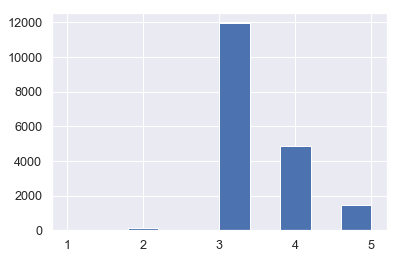

In [ ]:
# Visualizando a distribuição dos dados de condition em um histograma
df.condition.hist()

# Criação de variáveis usando pandas

Em Modelagem Estatística a criação de variáveis é de extrema relevância pois permite que o modelo fique mais explicativo e rico, e saber como criar variáveis que tenham poder explicativo acaba por ser uma arte que diferencia os bons cientistas de dados dos demais. Vamos passar por alguns exemplos simples para dar uma ideia de como agregar valor a um modelo através da criação de variáveis para o DataSet das casas.

Para um tutorial sobre funções [clique aqui](https://mode.com/python-tutorial/defining-python-functions/)

## Renovation Date

Ums boa forma de explorar a variável da data de renovação é criar uma DUMMY que indique se a casa foi renovada ou não - para isso, utilizamos o múdulo Numpy.Where, que traz uma condição para a existência de um renovation_date maior que zero como um valor 1 (True), e caso contrário um valor 0 (False)

In [ ]:
# Contagem dos valores da variável renovation date
df['renovation_date'].value_counts(dropna=False).head()

0       17661
2014       77
2003       34
2013       33
2007       30
Name: renovation_date, dtype: int64

In [ ]:
# Criando uma DUMMY para representar se a casa foi ou não reformada
df['dummy_reforma'] = np.where(df["renovation_date"]>0, 1, 0)

In [ ]:
# Verificando os valores da dummy reforma
df['dummy_reforma'].value_counts()

0    17661
1      787
Name: dummy_reforma, dtype: int64

## Tempo desde a última reforma

Vamos criar uma variável DUMMY que reflete o tempo desde a última reforma, entendendo que esta informação é relevante para a explicação do preço das casas.

In [ ]:
# Contando os valores da variável renovation date
df['renovation_date'].value_counts().head()

0       17661
2014       77
2003       34
2013       33
2007       30
Name: renovation_date, dtype: int64

In [ ]:
# Obtendo o valor máximo para a variável renovation date
df['renovation_date'].max()

2015

In [ ]:
# Criando uma outra DUMMY para representar o tempo em anos desde a última reforma
df['tempo_ultima_reforma'] = df['renovation_date'].max() - df['renovation_date']

In [ ]:
# Verificando os valores de tempo pra a última reforma
df['tempo_ultima_reforma'].value_counts(ascending=False,dropna=False).head()

2015    17661
1          77
12         34
2          33
8          30
Name: tempo_ultima_reforma, dtype: int64

In [ ]:
# Verificando a existência de valores nulos
df['tempo_ultima_reforma'].isnull().values.any()

False

In [ ]:
# Verificando a variável tempo_ultima_reforma no DataFrame
df.head()

,rowid,price,num_bed,num_bath,size_house,size_lot,num_floors,is_waterfront,condition,size_basement,year_built,renovation_date,zip,latitude,longitude,avg_size_neighbor_houses,avg_size_neighbor_lot,dummy_reforma,tempo_ultima_reforma
0,0,221900,3,1.00,1180,5650,1.0,0,3,0,1955,0,98178,47.511234,-122.256775,1340,5650,0,2015
1,1,538000,3,2.25,2570,7242,2.0,0,3,400,1951,1991,98125,47.721023,-122.318862,1690,7639,1,24
2,2,180000,2,1.00,770,10000,1.0,0,3,0,1933,0,98028,47.737927,-122.233196,2720,8062,0,2015
3,3,604000,4,3.00,1960,5000,1.0,0,5,910,1965,0,98136,47.520820,-122.393185,1360,5000,0,2015
4,4,510000,3,2.00,1680,8080,1.0,0,3,0,1987,0,98074,47.616812,-122.044901,1800,7503,0,2015


### Método mais genérico com uma função e um apply

Criando uma função para retornar a subtração do valor máximo pelo ano da data de renovação, e 99 caso a data de renovação seja 0 - depois disso a função é aplicada para a criação de uma nova variável para traduzir o tempo da última reforma.

In [ ]:
# Criando a coluna tempo_ultima_reforma através de uma função
# Utilização de um valor máximo de 99 que fica mais próximo dos que 2015
# Estatisticamente fica mais interpretativo para o algorítmo por estar mais próximo

%time

max_date = df['renovation_date'].max()

def subtrai_coluna_com_se(row):
    
    if row['renovation_date'] == 0:
        return 99
    else:
        return (max_date - row['renovation_date'])


df['tempo_ultima_reforma'] = df.apply(subtrai_coluna_com_se, axis = 1)

Wall time: 0 ns


In [ ]:
# Verificando os valores para a variável tempo_ultima_reforma
df['tempo_ultima_reforma'].value_counts().head()

99.0    17661
1.0        77
12.0       34
2.0        33
8.0        30
Name: tempo_ultima_reforma, dtype: int64

## Criando mais variáveis a partir da data de renovação das casas

A intenção é explicar da melhor forma o preço das casas, com base nos dados existentes - a partir daí o cientista de dados tem que ser criativo e assertivo nas escolhas das novas variáveis para a criação do melhor modelo para explicação e predição do preço das casas.

### Outra forma de criar uma DUMMY para diferenciar as casas que foram renovadas

In [ ]:
# A variável renovated? (yes or no) é binária e mostra se ela foi ou nunca foi reformada 
df["renovated?"] = df["renovation_date"].apply(lambda x: 1 if x!=0 else 0)

In [ ]:
df["renovated?"].value_counts()

0    17661
1      787
Name: renovated?, dtype: int64

### Criando uma variável recent_year

A estratégia é contemplar o ano de construção para as casas que não foram renovadas, e o ano de renovação para aquelas que foram renovadas.

In [ ]:
# A variável recent_year coloca nela qual é o ano do imóvel, sendo que considera o ano de renovação caso haja

df["recent_year"] = 0

df["recent_year"] = df.loc[df["renovation_date"]==0,"year_built"]

df.loc[df["renovation_date"] != 0,"recent_year"] = df.loc[df["renovation_date"] != 0 ,"renovation_date"]

In [ ]:
# Verificando os valores da variável recent_year
df["recent_year"].value_counts().head()

2014.0    545
2006.0    401
2005.0    401
2003.0    400
2004.0    399
Name: recent_year, dtype: int64

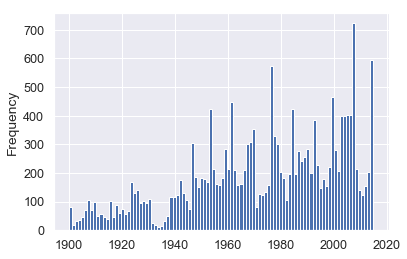

In [ ]:
# Visulaização da dsitribuição dos valores de da variável recent_year por um histograma
df["recent_year"].plot.hist(bins=100)

### Criando uma variável existence_year

Esta variável irá trazer os anos de existência de cada um dos imóveis

In [ ]:
# A variável existence_year traz a diferença entre o ano mais recente da base (2015) e a idade do imóvel (recent_year) 

df["existence_year"]=2015-df["recent_year"]

In [ ]:
# Verificando os valores da variável existence_year
df["existence_year"].value_counts(ascending=False).head()

1.0     545
10.0    401
9.0     401
12.0    400
11.0    399
Name: existence_year, dtype: int64

### Eliminando das colunas utilizadas na criação das novas variáveis

Esta ação visa evitar a autocorrelação estre as variávies e a sobreposição de efeitos

In [ ]:
# Eliminando as variáveis year_built e renovation_date do DataSet
df=df.drop(columns=["year_built","renovation_date"])

In [ ]:
# Veirficando as colunas e os seus respectivos valores do nosso DataFrame
df.head()

,rowid,price,num_bed,num_bath,size_house,size_lot,num_floors,is_waterfront,condition,size_basement,zip,latitude,longitude,avg_size_neighbor_houses,avg_size_neighbor_lot,dummy_reforma,tempo_ultima_reforma,renovated?,recent_year,existence_year
0,0,221900,3,1.00,1180,5650,1.0,0,3,0,98178,47.511234,-122.256775,1340,5650,0,99.0,0,1955.0,60.0
1,1,538000,3,2.25,2570,7242,2.0,0,3,400,98125,47.721023,-122.318862,1690,7639,1,24.0,1,1991.0,24.0
2,2,180000,2,1.00,770,10000,1.0,0,3,0,98028,47.737927,-122.233196,2720,8062,0,99.0,0,1933.0,82.0
3,3,604000,4,3.00,1960,5000,1.0,0,5,910,98136,47.520820,-122.393185,1360,5000,0,99.0,0,1965.0,50.0
4,4,510000,3,2.00,1680,8080,1.0,0,3,0,98074,47.616812,-122.044901,1800,7503,0,99.0,0,1987.0,28.0


In [ ]:
# Vefificando as informações básicas dos nossos dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18448 entries, 0 to 18447
Data columns (total 20 columns):
rowid                       18448 non-null int64
price                       18448 non-null int64
num_bed                     18448 non-null int64
num_bath                    18448 non-null float64
size_house                  18448 non-null int64
size_lot                    18448 non-null int64
num_floors                  18448 non-null float64
is_waterfront               18448 non-null int64
condition                   18448 non-null int64
size_basement               18448 non-null int64
zip                         18448 non-null int64
latitude                    18448 non-null float64
longitude                   18448 non-null float64
avg_size_neighbor_houses    18448 non-null int64
avg_size_neighbor_lot       18448 non-null int64
dummy_reforma               18448 non-null int32
tempo_ultima_reforma        18448 non-null float64
renovated?                  18448 non-null int64

# Analisando novamente as correlações para continuar o trabalho de criação de variáveis e modelagem estatística

Código em SQL:

SELECT zip, avg(price) as avg_price
from dataset_house
group by zip

In [ ]:
# Verificando quais as variáveis mais correlacionadas com o preço das casas do nosso DataSet
df.corr()['price'].sort_values(ascending=False)

price                       1.000000
size_house                  0.705586
avg_size_neighbor_houses    0.584300
num_bath                    0.528921
size_basement               0.324620
num_bed                     0.308478
latitude                    0.306535
is_waterfront               0.276230
num_floors                  0.259003
renovated?                  0.127768
dummy_reforma               0.127768
recent_year                 0.106434
size_lot                    0.090731
avg_size_neighbor_lot       0.083773
condition                   0.034974
rowid                       0.023700
longitude                   0.022048
zip                        -0.049826
existence_year             -0.106434
tempo_ultima_reforma       -0.133990
Name: price, dtype: float64

## Criando uma nova variável retirando o último dígito do ZIP CODE das casas

Podemos diminuir a dimensão da variável ZIP pegando os primeiros quatro números, dando uma ideia de casas que pertencem ao mesmo bairro

In [ ]:
# Criando uma coluna new_cep sem o último dígito do ZIP CODE
df['newcep'] = df.zip.astype(str).str[:4]

In [ ]:
# Verificando os valores da variável new_cep
df['newcep'].value_counts().head()

9805    2160
9811    2093
9803    1955
9800    1926
9802    1561
Name: newcep, dtype: int64

## Criando uma variável de tamanho das casas do bairro

Para isso agruparemos os ZIPs calculando a média dos tamanhos das casas para cada um, criando uma nova coluna com o tamanho médio. Vamos usar funções no SQL e no pandas.

Inicialmente vamos verificar qual o preço médio das casas para cada ZIP CODE da base

In [ ]:
# Identificando os valores dos preços médios das casas por ZIP com uma função FOR

for cep in df.zip.unique():
    temp = df[df.zip==cep]
    print(cep,temp['price'].mean())

98178 315361.33928571426
98125 469874.41456582636
98028 456294.76271186443
98136 554923.0575221239
98074 685753.3164893617
98053 680962.6520467836
98003 291310.82157676347
98146 359635.6907630522
98038 364155.00396825396
98007 607545.8031496063
98115 627342.6868686868
98107 584841.8873873873
98126 423354.8181818182
98019 429245.1055900621
98103 590775.65234375
98002 232699.67455621302
98133 388978.5419664269
98040 1197649.9917695473
98092 338014.44701986754
98030 295416.52702702704
98119 864284.0066225166
98027 613300.1392045454
98117 579698.489539749
98058 356041.0129533679
98001 276856.35782747605
98166 469213.5898617511
98023 285712.1864801865
98056 422143.3604651163
98105 862116.6395939087
98042 309474.0
98008 658332.3703703703
98059 488769.1582914573
98148 280923.9583333333
98122 638669.6396761134
98144 595277.9117647059
98004 1384041.1278195488
98005 815354.6293706293
98034 520493.8595387841
98116 619534.1993006993
98010 433683.9880952381
98118 423394.1865168539
98199 799920.5427

In [ ]:
# Criação de um DataFrame para o tamanho médio das casas para cada ZIP CODE
# Aproveitando o tamanho médio das casas com mesmo ZIP CODE
df_zip = df.groupby(['zip']).agg({'size_house':'mean'})
df_zip.shape

(70, 1)

In [ ]:
# Visualizando as informações do novo DataFrame criado
df_zip.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70 entries, 98001 to 98199
Data columns (total 1 columns):
size_house    70 non-null float64
dtypes: float64(1)
memory usage: 1.1 KB


Para aplicar o tamanho médio das casas por ZIP devemos fazer um MERGE - código no SQL 

SELECT *
FROM df 
    inner join df_zip ON df_zip.index = df.zip
    
    
    
Seguindo com o código em Pandas

In [ ]:
# Fazendo uma merge dos dois DataFrames para capturar o tamanho médio das casas por ZIP CODE em pandas
df = pd.merge(df, df_zip, how='inner', left_on='zip', right_index=True)

In [ ]:
# Verificando as dimensões do DataFrame
df.shape

(18448, 22)

In [ ]:
# Verificando as colunas e os dados do DataFrame
df.head()

,rowid,price,num_bed,num_bath,size_house_x,size_lot,num_floors,is_waterfront,condition,size_basement,...,longitude,avg_size_neighbor_houses,avg_size_neighbor_lot,dummy_reforma,tempo_ultima_reforma,renovated?,recent_year,existence_year,newcep,size_house_y
0,0,221900,3,1.00,1180,5650,1.0,0,3,0,...,-122.256775,1340,5650,0,99.0,0,1955.0,60.0,9817,1744.0625
100,100,205425,2,1.00,880,6780,1.0,0,4,0,...,-122.247815,1190,6780,0,99.0,0,1945.0,70.0,9817,1744.0625
108,108,445000,3,2.25,2100,8201,1.0,0,3,480,...,-122.243609,2660,8712,0,99.0,0,1967.0,48.0,9817,1744.0625
230,230,236000,3,1.00,1300,5898,1.0,0,3,0,...,-122.255356,1320,7619,0,99.0,0,1961.0,54.0,9817,1744.0625
237,237,170000,2,1.00,860,5265,1.0,0,3,0,...,-122.272166,1650,8775,0,99.0,0,1931.0,84.0,9817,1744.0625


Após o MERGE dos DataFrames (original e o df_zip), a coluna size_house passou a ser chamada de size_house_x e o tamanho médio das casas do mesmo bairro passou a ser size_house_y.

In [ ]:
# Verificando as informações básicas do DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18448 entries, 0 to 17970
Data columns (total 22 columns):
rowid                       18448 non-null int64
price                       18448 non-null int64
num_bed                     18448 non-null int64
num_bath                    18448 non-null float64
size_house_x                18448 non-null int64
size_lot                    18448 non-null int64
num_floors                  18448 non-null float64
is_waterfront               18448 non-null int64
condition                   18448 non-null int64
size_basement               18448 non-null int64
zip                         18448 non-null int64
latitude                    18448 non-null float64
longitude                   18448 non-null float64
avg_size_neighbor_houses    18448 non-null int64
avg_size_neighbor_lot       18448 non-null int64
dummy_reforma               18448 non-null int32
tempo_ultima_reforma        18448 non-null float64
renovated?                  18448 non-null int64

In [ ]:
# Contando os valores da variável com o tamanho médio das casas
df.size_house_y.value_counts().head()

1665.183594    512
2132.827381    504
1861.971717    495
1708.723849    478
1989.010482    477
Name: size_house_y, dtype: int64

In [ ]:
# Verificando a quantidade de valores únicos de média para o tamanho das casas
df.size_house_y.unique().shape

(70,)

## Criando uma variável para fortalecer o preço das casas que são maiores que a média das casas do bairro

Tendo a média dos valores da vizinhança podemos criar uma variavel de quanto a casa é maior do que a média das casas da vizinhança e criamos um indice com isso.

In [ ]:
# Criando um índice para a taxa de o quanto uma casa é maior que as casas do bairro
df['indice_invejinha'] = df['size_house_x'] / df['size_house_y']

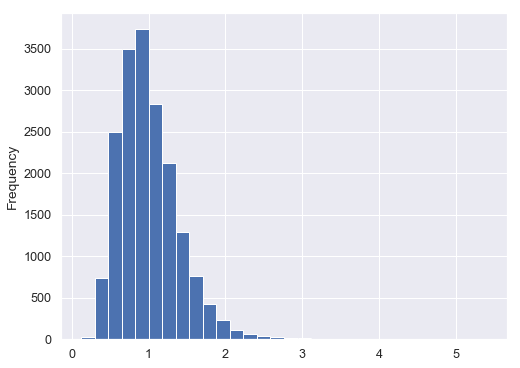

In [ ]:
# Visualizando a distribuição do índice da casas do bairro
df['indice_invejinha'].plot.hist(bins=30, figsize=(8,6))

In [ ]:
# Verificando as variáveis que mais se correlacionam com o preço das casas
df.corr()['price'].sort_values(ascending=False)

price                       1.000000
size_house_x                0.705586
avg_size_neighbor_houses    0.584300
indice_invejinha            0.535581
num_bath                    0.528921
size_house_y                0.444631
size_basement               0.324620
num_bed                     0.308478
latitude                    0.306535
is_waterfront               0.276230
num_floors                  0.259003
renovated?                  0.127768
dummy_reforma               0.127768
recent_year                 0.106434
size_lot                    0.090731
avg_size_neighbor_lot       0.083773
condition                   0.034974
rowid                       0.023700
longitude                   0.022048
zip                        -0.049826
existence_year             -0.106434
tempo_ultima_reforma       -0.133990
Name: price, dtype: float64

# Heterocedasticidade

<br>
<img src="img/heterocedasticidade.png" width="450" />
<br>

Heteroscedasticidade ou Heterocedasticidade é o fenômeno estatístico que ocorre quando o modelo de hipótese matemático apresenta variâncias para Y e X(X1, X2, X3,..., Xn) não iguais para todas as observações, contrariando o postulado : $E(u^2)=σ^2; i = 1 , 2 , ⋯ + n $

Esta hipótese do Modelo Clássico de Regressão Linear, pressupõe que a variância de cada termo de perturbação $u_i$, condicional aos valores escolhidos das variáveis explicativas, é algum número constante igual a $σ^2$.Ou seja, este postulado é a da homoscedasticidade, ou igual (homo) dispersão (scedasticidade), isto é, igual variância.

Em outras palavras, a heterocedasticidade apresenta-se como uma forte dispersão dos dados em torno de uma reta; uma dispersão dos dados perante um modelo econométrico regredido.

Uma definição mais precisa seria na qual uma distribuição de frequência em que todas as distribuições condicionadas têm desvios padrão diferentes.

O contrário desse fenômeno, a homocedasticidade, se dá pela observância do postulado, isto é, os dados regredidos encontram-se mais homogeneamente e menos dispersos (concentrados) em torno da reta de regressão do modelo.

Sua detecção pode ser realizada por meio do Teste de White, que consiste num teste residual. 

A heteroscedasticidade não elimina as propriedades de inexistência de viés e consistência dos estimadores de MQO, no entanto, eles deixam de ter variância mínima e eficiência, ou seja, não são os melhores estimadores lineares não-viesados (MELNV).

As medidas corretivas não são fáceis de serem implementadas. Se a amostra for grande, podemos obter os erros padrão com heteroscedasticidade corrigida segundo White dos estimadores de MQO e realizar inferências estatísticas com base nesses erros padrão. Por exemplo, no software Eviews, esta opção está disponível no menu quick, estimate equation, options e então seleciona-se a opção Heterokedasticity consistent coeficient covariance, White.

Diferentemente, se olharmos os resíduos de MQO, podemos levantar hipóteses sobre o provável padrão da heteroscedasticidade e transformar os dados originais de tal forma que não haja heteroscedasticidade nos dados transformados.

É comum seu acontecimento quando de pesquisas com dados em corte, ou seção transversal (cross section - observações de dados sobre unidades econômicas de diferentes tamanhos). 



# Homocedasticidade

Na estatística, uma sequência ou um vetor de variáveis aleatórias é homoscedástico se todas as variáveis aleatórias na sequência ou vetor tiverem a mesma variância finita. Isso também é conhecido como homogeneidade de variância. A noção complementar é chamada heterocedasticidade. As grafias homoscedasticidade e heteroscedasticidade também são usadas com frequência.

A suposição de homocedasticidade simplifica o tratamento matemático e computacional. Graves violações na homocedasticidade (supondo-se que a distribuição dos dados é homocedástica quando na realidade é heteroscedástica) pode resultar em superestimar a qualidade do ajuste medido pelo coeficiente de Pearson. Exemplo: Salario e poupança

## Aplicando os conceitos de Heterocedasticidade ao nosso exemplo

Analisando o primeiro scatterplot (preço x tamanho), notamos algumas variaveis com variância não constante, para torna-la homocedastica podemos aplicar diversas técnicas, usaremos o mais simples que é a aplicação de **LOG** nas duas variaveis pois além de conseguirmos a variância constante, temos uma interpretação de elasticidade (taxa de variação) para os parâmetros.

**Vale ressaltar que a função LOG do Numpy está se referindo à operação de Logarítmo Natural, ou Logarítmo na base *e*, que é o número de Euller**

## Número de Euller

Na matemática, o número de Euler, denominado em homenagem ao matemático suíço Leonhard Euler, é a base dos logaritmos naturais. As variantes do nome do número incluem: número de Napier, número de Neper, constante de Néper, número neperiano, constante matemática, número exponencial etc. A primeira referência à constante foi publicada em 1618 na tabela de um apêndice de um trabalho sobre logaritmos de John Napier. No entanto, este não contém a constante propriamente dita, mas apenas uma simples lista de logaritmos naturais calculados a partir desta. A primeira indicação da constante foi descoberta por Jakob Bernoulli, quando tentava encontrar um valor para a expressão do cálculo de juros compostos, cujo valor é aproximadamente 2,718281828459045235360287. 

Abaixo a relação entre Preços e o tamanho da casa que imaginamos que tenha uma forte e positiva correlação.

In [ ]:
# Verificando a correlação entre o tamanho e o preço das casas
df[['size_house_x', 'price']].corr()

,size_house_x,price
size_house_x,1.000000,0.705586
price,0.705586,1.000000


In [ ]:
# Definindo um SAMPLE do nosso DataFrame original com 1000 observação
# Com semente fixa para não incorrer em amostras diferentes
sample = df.sample(n=1000,random_state=1)

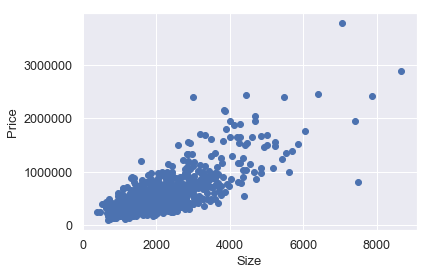

In [ ]:
# Gráfico de dispersão do preço das casas pelo seu tamanho

fig, ax = plt.subplots()
ax.scatter(x = sample['size_house_x'], y = sample['price'])
plt.ylabel('Price', fontsize=13)
plt.xlabel('Size', fontsize=13)
plt.show()

O formato do gráfico em funil é um clássico exemplo de Heterocedasticidade

## LOG: linearização corrige tanto a não linearidade, ameniza outliers e heterocedasticidade. 

Não necessáriamente precisamos ter distribuições normais para nossas amostras, mas ela ter essa caracteristica permite que façamos analises não só mais eficientes mas principalmente mais robustas já que a maioria dos algoritmos de regressões que usaremos trazem betas significativos para qualquer distribuição apenas com o primeiro momento, mas não somos capazes de fazer testes de hipótese sem o segundo momento.




 mu = 549494.45 and sigma = 365078.62



Text(0.5,1,'Price distribution')

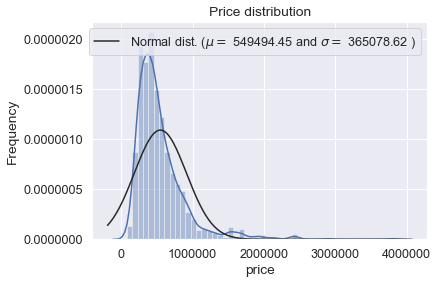

In [ ]:
# Plotando o gráfico de distribuição dos preços das casas com a aproximação da curva normal
# Identificação de uma assimetria positiva

sns.distplot(sample['price'] , fit=stats.norm);

(mu, sigma) = stats.norm.fit(sample['price'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Price distribution')


## Gráfico Q-Q

<br>
<img src="img/qqplot.png" width="450" />
<br>

*Origem: Wikipédia, a enciclopédia livre.*

Um gráfico Q-Q dados exponenciais independentes e randomicamente gerados, (X ~ Exp(1)). Este gráfico Q–Q compara uma amostra de dados no eixo vertical a uma estatística de população no eixo horizontal. Os pontos seguem um forte padrão não linear, sugerindo que os dados não são distribuídos com um padrão normal (X ~ N(0,1)). O deslocamento entre a linha e os pontos sugere que a média dos dados não é 0. A mediana dos pontos pode ser determinada a estar perto de 0,7
Gráfico Q-Q normal comparando dados normais independentes gerados aleatoriamente no eixo vertical a uma população normal padrão no eixo horizontal. A linearidade dos pontos sugere que os dados são normalmente distribuídos.

Em estatística, um gráfico Q-Q[1] ("Q" significa quantil) é um gráfico de probabilidades, que é um método gráfico para comparar duas distribuições de probabilidade, traçando seus quantis uns contra os outros. Primeiro, o conjunto de intervalos para os quantis é escolhido. Um ponto (x, y) no gráfico corresponde a um dos quantis da segunda distribuição (coordenada y) plotadas contra o mesmo mesmo quantil da primeira distribuição de (coordenada x). Portanto, a linha é uma curva paramétrica com o parâmetro que é o (número do) intervalo para quantil.

Se as duas distribuições que estão sendo comparadas são semelhantes, os pontos no gráfico Q-Q vai repousar na linha y = x, aproximadamente. Se as distribuições são linearmente relacionadas, os pontos no gráfico Q-Q irão repousar em uma linha, aproximadamente, mas não necessariamente na linha y = x. gráficos Q-Q também podem ser usados como meio gráfico de estimativa de parâmetros de dispersão e tendência central em uma família de distribuições.

Um gráfico Q-Q é usado para comparar as formas de distribuições, fornecendo uma exibição gráfica de como as propriedades, tais como medidas de tendência central, dispersão e assimetria são semelhantes ou diferentes nas duas distribuições. gráficos Q-Q podem ser usados para comparar conjuntos de dados ou distribuições teóricas. O uso de gráficos Q-Q para comparação de duas amostras de dados pode ser visto como uma abordagem não-paramétrica para comparação de suas distribuições subjacentes. Um gráfico Q-Q geralmente é uma abordagem mais poderosa para fazer isso do que a técnica comum de comparação de histogramas das duas amostras, mas requer mais habilidade para interpretar. Gráficos Q-Q são comumente usados para comparar um conjunto de dados com um modelo teórico.[2] Isto pode fornecer uma avaliação de "qualidade de ajuste" que é gráfica, ao invés de reduzir a uma exibição numérica. gráficos Q-Q também são usados para comparar duas distribuições teóricas entre si. Uma vez que gráficos Q-Q compararam distribuições, não há necessidade para os valores a serem observados como pares, como em um gráfico de dispersão, ou mesmo para o número de valores nos dois grupos sendo comparados ser igual.

O termo "gráfico de probabilidades" às vezes, refere-se especificamente a um gráfico Q-Q, umas vezes a uma classe gráficos e outras para o menos comumente usado gráfico P-P. O coeficiente de correlação do gráfico de probabilidade é uma grandeza derivada da ideia de gráficos Q-Q, que mede a concordância de uma distribuição ajustada com os dados observados e que às vezes é usada como um meio de ajuste de uma distribuição de dados. 

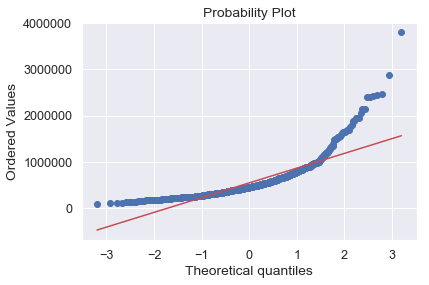

In [ ]:
# Plotando o gráfico de probabilidade dos preços das casas
# Checando a variação do preço das casas com perfil de função exponencial
fig = plt.figure()
res = stats.probplot(sample['price'], plot=plt)
plt.show()

## Aplicando log natural aos preços e aos tamanhos das casas

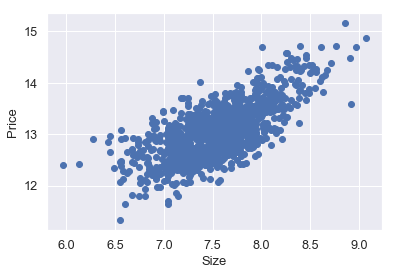


 mu = 13.06 and sigma = 0.54



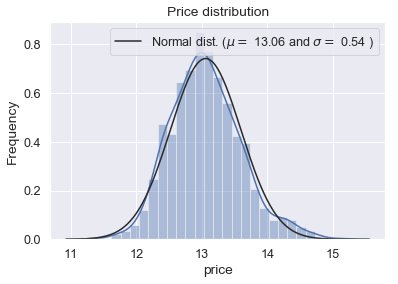

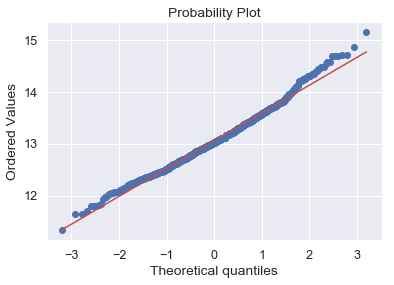

In [ ]:
# Aplicação da transformação logarítmica tanto no preço quanto no tamanho das casas

# Plotando um gráfico de dispersão com o LOG dos preços e tamanho das casas
# A dispersão demonstra que a variância dos dados ficou constante (homocedasticidade)
fig, ax = plt.subplots()
ax.scatter(x = np.log(sample['size_house_x']), y = np.log(sample['price']))
plt.ylabel('Price', fontsize=13)
plt.xlabel('Size', fontsize=13)
plt.show()

# Plotando a distribuição dos dados com a densidade de probabilidade (Normal)
sns.distplot(np.log(sample['price']) , fit=stats.norm);

(mu, sigma) = stats.norm.fit(np.log(sample['price']))
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Price distribution')

# Plotando a variação dos dados por Quantil-Quantil plot
fig = plt.figure()
res = stats.probplot(np.log(sample['price']), plot=plt)
plt.show()

# A segunda variável com maior correlação é a média de tamanho das casas da vizinhança.

Uma forma alternativa de transformação dessa informação em uma variavel explicativa interessante é considerar não exatamente o tamanho médio das casas do bairro, mas o quanto estamos proximos ou longe da média das casas do bairro, pois a média pode ser grande ou pequena, mas nossa casa pode ser ainda maior ou ainda menor, não fazendo a comparação relativa. 

Portanto vamos analisar a variável, aplicar a LOG-Linearização e criar uma nova variável que será uma proporção entre a venda e a sua média.

Obs: Não faria sentido criar novas variaveis que fossem combinações lineares entre as variaveis do modelo, muitos softwares simplesmente não rodam por não conseguirem inveter a matriz de parametros (X) acusando multicolinearidade perfeita (ou em termos mais economicos, a variavel criada como combinação linear de outras não acrescenta nenhum novo poder explicativo ao modelo), neste casso criaremos um indice percentual para testarmos sua correlação com o preço.


 mu = 1992.04 and sigma = 725.49



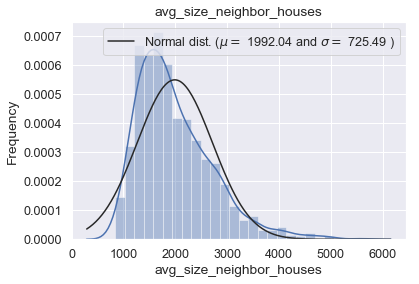

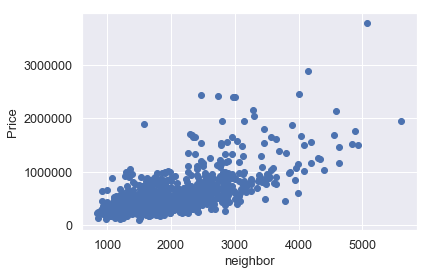

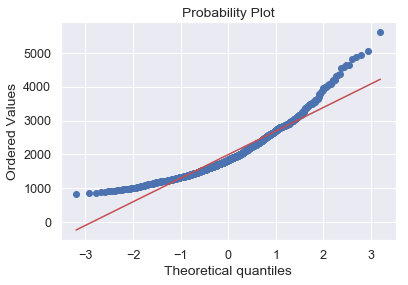

In [ ]:
# Plotando o gráfico de distribuição dos tamanhos médios das casas da vizinhança com a aproximação da curva normal
sns.distplot(sample['avg_size_neighbor_houses'] , fit=stats.norm);

(mu, sigma) = stats.norm.fit(sample['avg_size_neighbor_houses'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],loc='best')
plt.ylabel('Frequency')
plt.title('avg_size_neighbor_houses')

# Gráfico de dispersão dos tamanhos médios das cadas da vizinhança pelo preço
fig, ax = plt.subplots()
ax.scatter(x = sample['avg_size_neighbor_houses'], y = sample['price'])
plt.ylabel('Price', fontsize=13)
plt.xlabel('neighbor', fontsize=13)
plt.show()

# Gráfico de probabilidades dos tamanhos médios das cadas da vizinhança
res1 = stats.probplot(sample['avg_size_neighbor_houses'], plot=plt)
plt.show()



## Aplicando log natural aos tamanhos médios das cadas da vizinhança


 mu = 7.54 and sigma = 0.34



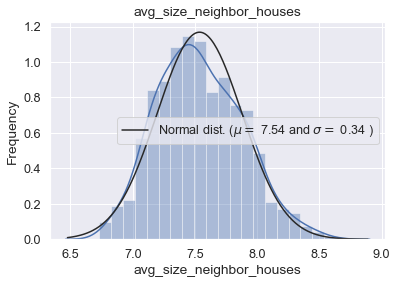

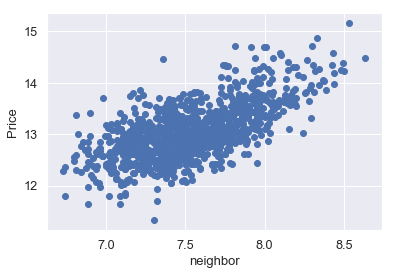

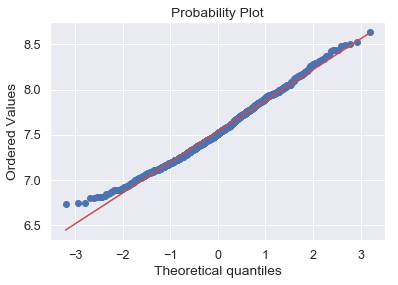

In [ ]:
# Aplicação da transformação logarítmica tanto no tamanho das casas da vizinhança

# Gráfico de distribuição com LOG aos tamanhos médios das cadas da vizinhança
sns.distplot(np.log(sample['avg_size_neighbor_houses']) , fit=stats.norm);

(mu, sigma) = stats.norm.fit(np.log(sample['avg_size_neighbor_houses']))
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],loc='best')
plt.ylabel('Frequency')
plt.title('avg_size_neighbor_houses')

# Gráfico de dispersão dos tamanhos médios das cadas da vizinhança pelo preço
fig, ax = plt.subplots()
ax.scatter(x = np.log(sample['avg_size_neighbor_houses']), y = np.log(sample['price']))
plt.ylabel('Price', fontsize=13)
plt.xlabel('neighbor', fontsize=13)
plt.show()

#Gráfico de probabilidades dos tamanhos médios das cadas da vizinhança
res2 = stats.probplot(np.log(sample['avg_size_neighbor_houses']), plot=plt)
plt.show()

## Como escolher as variáveis que deveriamos aplicar LOG

Uma distribuição normal tem 4 momentos como as outras, mas só precisamos definir os 2 primeiros:

- Média 
- Desvio-Padrão

os outros dois momentos, assimetria e curtose, são fixos para qualquer curva normal

- Assimetria = 0 
- Curtose = 3 

Uma forma mais analitica é vermos quais são esses dois parâmetros da nossa distribuição, e caso estejam muito distante do padrão, a variável é uma boa candidata a log-linearização.

In [ ]:
# Calculando a assimetria (skew) para as variáveis independentes e colocando em um DataFrame

numeric_feats = df.dtypes[df.dtypes != "object"].index

skewed_feats = df[numeric_feats].apply(lambda x: stats.skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
size_lot,13.396166
is_waterfront,11.306838
avg_size_neighbor_lot,9.059845
renovated?,4.526088
dummy_reforma,4.526088
price,4.115432
num_bed,2.216423
size_basement,1.570224
size_house_x,1.502484
indice_invejinha,1.253267


In [ ]:
#stats.skew(df['size_lot'])

Segundo estas informações, todas as variáveis com assimetria acima de 3 poderiam ser linearizadas pela aplicação do LOG natural.

## Outras opções de transformações matemáticas

Além da transformação Log-normal, existem outras opções para tratamento de dados com assimetria. Para saber mais sobre estas transformações leia o artigo [Transforming Skewed Data](https://towardsdatascience.com/transforming-skewed-data-73da4c2d0d16)

# Variáveis Candidatas a Categóricas

## Dummy variable (statistics)

<br>
<img src="img/dummies.png" width="450" />
<br>

*Origem: Wikipédia, a enciclopédia livre*

Em estatística e econometria, particularmente na análise de regressão, uma variável dummy (também conhecida como variável indicadora, variável de design, codificação de um hot, indicador booleano, variável binária, ou variável qualitativa) é aquela que leva a valor 0 ou 1 para indicar a ausência ou presença de algum efeito categórico que pode ser esperado para mudar o resultado. Variáveis ​​dummy são usadas como dispositivos para classificar os dados em categorias mutuamente exclusivas (como fumante / não fumante, etc.). Por exemplo, na análise econométrica de séries temporais, variáveis ​​dummy podem ser usadas para indicar a ocorrência de guerras ou grandes greves. Uma variável dummy pode, assim, ser considerada como um valor de verdade representado como um valor numérico 0 ou 1 (como às vezes é feito na programação de computadores).

Variáveis ​​dummy são variáveis ​​"proxy" ou substitutos numéricos para fatos qualitativos em um modelo de regressão. Na análise de regressão, as variáveis ​​dependentes podem ser influenciadas não apenas por variáveis ​​quantitativas (renda, produto, preços, etc.), mas também por variáveis ​​qualitativas (gênero, religião, região geográfica, etc.). Uma variável independente fictícia (também chamada de variável explicativa fictícia) que para algumas observações tem um valor de 0 fará com que o coeficiente dessa variável não tenha nenhum papel em influenciar a variável dependente, enquanto quando o dummy assume um valor 1 seu coeficiente age para alterar a interceptação. Por exemplo, suponha que a associação em um grupo seja uma das variáveis ​​qualitativas relevantes para uma regressão. Se a associação ao grupo receber arbitrariamente o valor de 1, todos os outros receberão o valor 0. Então, o intercepto (o valor da variável dependente se todas as outras variáveis ​​explicativas assumiram hipoteticamente o valor zero) seria o termo constante para membros, mas seria o termo constante mais o coeficiente do manequim de associação no caso dos membros do grupo.

Variáveis ​​dummy são usadas freqüentemente na análise de séries temporais com mudança de regime, análise sazonal e aplicações de dados qualitativos. Variáveis ​​dummy estão envolvidas em estudos para previsão econômica, estudos biomédicos, pontuação de crédito, modelagem de resposta, etc. Variáveis ​​dummy podem ser incorporadas em métodos tradicionais de regressão ou paradigmas de modelagem desenvolvidos recentemente.

Análise das variáveis categóricas com sugestão de tratamento através da criação de ***DUMMIES*** de forma que sejam melhor interpretadas pelo modelo e representam da melhor forma a composição dos preços das casas

In [ ]:
# Verificando os dados as variáveis do DataFrame
df.head()

,rowid,price,num_bed,num_bath,size_house_x,size_lot,num_floors,is_waterfront,condition,size_basement,...,avg_size_neighbor_houses,avg_size_neighbor_lot,dummy_reforma,tempo_ultima_reforma,renovated?,recent_year,existence_year,newcep,size_house_y,indice_invejinha
0,0,221900,3,1.00,1180,5650,1.0,0,3,0,...,1340,5650,0,99.0,0,1955.0,60.0,9817,1744.0625,0.676581
100,100,205425,2,1.00,880,6780,1.0,0,4,0,...,1190,6780,0,99.0,0,1945.0,70.0,9817,1744.0625,0.504569
108,108,445000,3,2.25,2100,8201,1.0,0,3,480,...,2660,8712,0,99.0,0,1967.0,48.0,9817,1744.0625,1.204085
230,230,236000,3,1.00,1300,5898,1.0,0,3,0,...,1320,7619,0,99.0,0,1961.0,54.0,9817,1744.0625,0.745386
237,237,170000,2,1.00,860,5265,1.0,0,3,0,...,1650,8775,0,99.0,0,1931.0,84.0,9817,1744.0625,0.493102


In [ ]:
# Verificando o tamanho do DataFrame
df.shape

(18448, 23)

In [ ]:
# Plotando uma lista com o nome das colunas do DataFrame
list(df.columns)

['rowid',
 'price',
 'num_bed',
 'num_bath',
 'size_house_x',
 'size_lot',
 'num_floors',
 'is_waterfront',
 'condition',
 'size_basement',
 'zip',
 'latitude',
 'longitude',
 'avg_size_neighbor_houses',
 'avg_size_neighbor_lot',
 'dummy_reforma',
 'tempo_ultima_reforma',
 'renovated?',
 'recent_year',
 'existence_year',
 'newcep',
 'size_house_y',
 'indice_invejinha']

## Analisando a variável do número de banheiros das casas

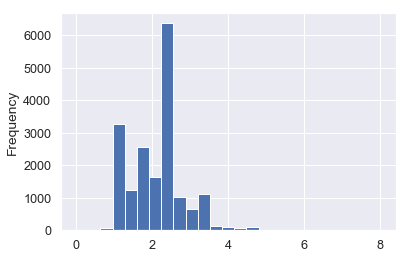

In [ ]:
# Plotando um histograma com a distribuição do número de banheiros das casas
df.num_bath.plot.hist(bins=25)

In [ ]:
# Contando o número de observações para cada quantidade de banheiros
df.num_bath.value_counts()

2.50    4607
1.00    3278
1.75    2576
2.25    1764
2.00    1642
1.50    1232
2.75    1012
3.00     648
3.50     618
3.25     514
3.75     140
4.00     111
4.50      88
4.25      67
0.75      57
4.75      19
5.00      16
5.25      13
5.50      10
0.00       7
1.25       6
6.00       6
5.75       4
0.50       3
8.00       2
6.50       2
6.75       2
6.25       2
7.50       1
7.75       1
Name: num_bath, dtype: int64

In [ ]:
# Criando uma coluna com o LOG dos preços das casas
df['log_price'] = np.log1p(df['price'])

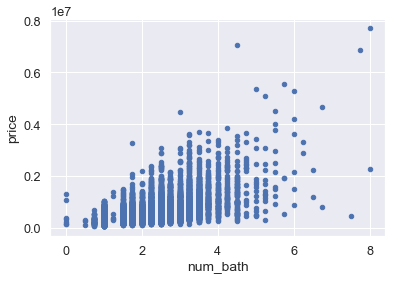

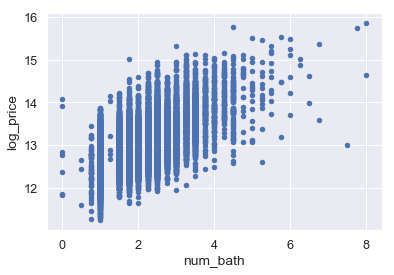

In [ ]:
# Comparando graficamente a distribuição do número de banheiros das casas pelo preço

# Dispersão do preço dascasas pelo número de banheiros
df.plot.scatter(x='num_bath', y='price')
# Dispersão do Log do preço das casas pelo número de benheiros
df.plot.scatter(x='num_bath', y='log_price')

### Rodando regressões do número de banheiros das casas pelo preço

In [ ]:
# Regressão simples do número de banheiros pelo preço das casas

function1 = '''
price ~ num_bath
'''

model1 = smf.ols(function1, df).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.280
Model:                            OLS   Adj. R-squared:                  0.280
Method:                 Least Squares   F-statistic:                     7165.
Date:                Wed, 21 Aug 2019   Prob (F-statistic):               0.00
Time:                        20:01:55   Log-Likelihood:            -2.5978e+05
No. Observations:               18448   AIC:                         5.196e+05
Df Residuals:                   18446   BIC:                         5.196e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2572.7382   6787.528      0.379      0.7

In [ ]:
# Regressão simples do número de banheiros pelo LOG do preço das casas

function1 = '''
np.log1p(price) ~ num_bath
'''

model1 = smf.ols(function1, df).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:        np.log1p(price)   R-squared:                       0.308
Model:                            OLS   Adj. R-squared:                  0.308
Method:                 Least Squares   F-statistic:                     8197.
Date:                Wed, 21 Aug 2019   Prob (F-statistic):               0.00
Time:                        20:02:54   Log-Likelihood:                -11039.
No. Observations:               18448   AIC:                         2.208e+04
Df Residuals:                   18446   BIC:                         2.210e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.2453      0.009   1293.889      0.0

In [ ]:
# Rodando uma regressão com o número de banheiros como DUMMIES pelo preço das casas
# As 

function1 = '''
price ~ C(num_bath)
'''

model1 = smf.ols(function1, df).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.362
Model:                            OLS   Adj. R-squared:                  0.361
Method:                 Least Squares   F-statistic:                     360.7
Date:                Wed, 21 Aug 2019   Prob (F-statistic):               0.00
Time:                        20:04:57   Log-Likelihood:            -2.5865e+05
No. Observations:               18448   AIC:                         5.174e+05
Df Residuals:                   18418   BIC:                         5.176e+05
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            5.204e+05   1

In [ ]:
# Calculando as correlações entre os preços, LOG de preços e número de banheiros

df[['price', 'log_price', 'num_bath']].corr().round(2)

,price,log_price,num_bath
price,1.00,0.89,0.53
log_price,0.89,1.00,0.55
num_bath,0.53,0.55,1.00


### Criando variáveis com as CATEGORIAS para número de banheiros

Serão atribuidos valores inteiros para a criação de novas variáveis que representam novas CATEGORIAS para número de banheiros e número parcial de banheiros, com limitação para os maiores valores pequeno número de incidências.

O objetivo é obter distribuições que sejam parecidas com a Normal, além de eliminar outliers e dessa forma possam melhor representar a composição dos preços das casas.

In [ ]:
# Contando a quantidade de casas por número de banheiros
df['num_bath'].value_counts()

2.50    4607
1.00    3278
1.75    2576
2.25    1764
2.00    1642
1.50    1232
2.75    1012
3.00     648
3.50     618
3.25     514
3.75     140
4.00     111
4.50      88
4.25      67
0.75      57
4.75      19
5.00      16
5.25      13
5.50      10
0.00       7
1.25       6
6.00       6
5.75       4
0.50       3
8.00       2
6.50       2
6.75       2
6.25       2
7.50       1
7.75       1
Name: num_bath, dtype: int64

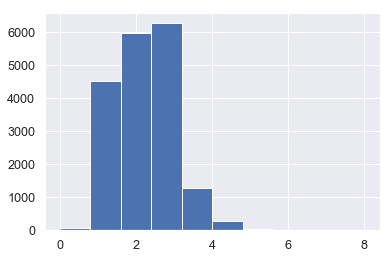

In [ ]:
# Plotnado o histograma com a distribuição do número de banheiros
df['num_bath'].hist()

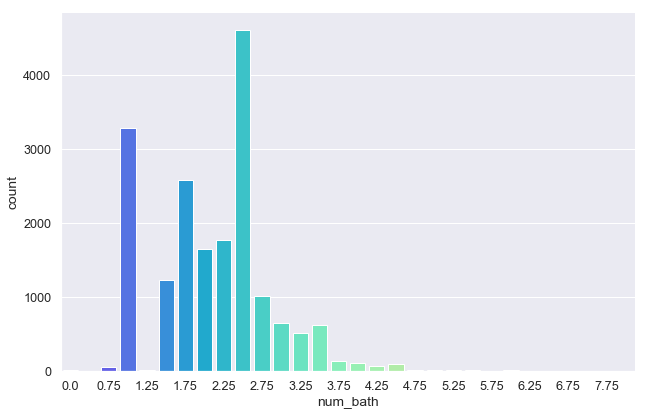

In [ ]:
# Plotando o gráfico de distribuição por número de banheiros com Seaborn
g = sns.factorplot(x="num_bath", data=df, kind="count",
                   palette="rainbow", size=6, aspect=1.5)
g.set_xticklabels(step=2)


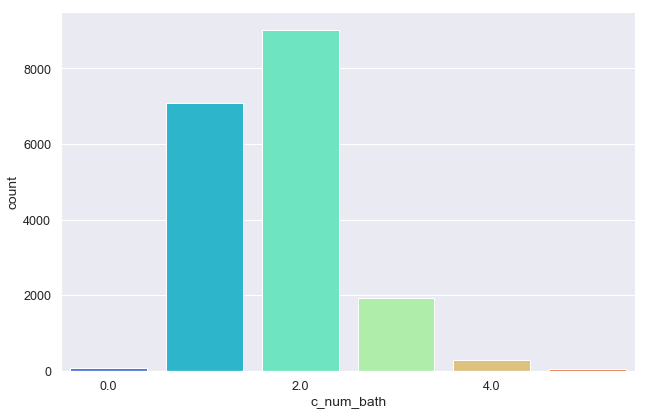

In [ ]:
# Criando uma nova DUMMY para o número de banheiros e plotando a distribuição
df['c_num_bath'] = df.num_bath.replace({0:0, 0.50:0, 0.75:0,
                                          1:1, 1.25:1, 1.50:1, 1.75:1,
                                          2:2, 2.25:2, 2.50:2, 2.75:2,
                                          3:3, 3.25:3, 3.50:3, 3.75:3,
                                          4:4, 4.25:4, 4.50:4, 4.75:4,
                                          5:5, 5.25:5, 5.50:5, 5.75:5,
                                          6:5, 6.25:5, 6.50:5, 6.75:5,
                                          7:5, 7.25:5, 7.50:5, 7.75:5,
                                          8:5})

g = sns.factorplot(x="c_num_bath", data=df, kind="count",
                   palette="rainbow", size=6, aspect=1.5)
g.set_xticklabels(step=2)

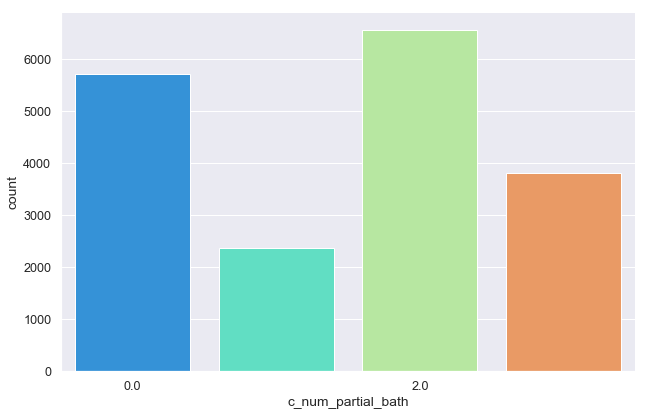

In [ ]:
# Criando uma nova DUMMY para o número de banheiros PARCIAIS e plotando a distribuição
df['c_num_partial_bath'] = df.num_bath.replace({0:0, 0.25:1, 0.50:2, 0.75:3,
                                                  1:0, 1.25:1, 1.50:2, 1.75:3,
                                                  2:0, 2.25:1, 2.50:2, 2.75:3,
                                                  3:0, 3.25:1, 3.50:2, 3.75:3,
                                                  4:0, 4.25:1, 4.50:2, 4.75:3,
                                                  5:0, 5.25:1, 5.50:2, 5.75:3,
                                                  6:0, 6.25:1, 6.50:2, 6.75:3,
                                                  7:0, 7.25:1, 7.50:2, 7.75:3,
                                                  8:0})

# Plotando uma distribuição por número parcial de banheiros
g = sns.factorplot(x="c_num_partial_bath", data=df, kind="count",
                   palette="rainbow", size=6, aspect=1.5)

g.set_xticklabels(step=2)

### Rodando a regressão com as novas variáveis para o número de banheiros

In [ ]:
# Regressão para o número de banheiros das casas
# Todas as variáveis criadas são estatísticamente significante
function1 = '''
np.log1p(price) ~ C(c_num_bath) + C(c_num_partial_bath) 
'''

model1 = smf.ols(function1, df).fit()
print(model1.summary())

                       Results: Ordinary least squares
Model:                  OLS                 Adj. R-squared:        0.316     
Dependent Variable:     np.log1p(price)     AIC:                   21861.5600
Date:                   2019-08-21 20:09    BIC:                   21931.9644
No. Observations:       18448               Log-Likelihood:        -10922.   
Df Model:               8                   F-statistic:           1067.     
Df Residuals:           18439               Prob (F-statistic):    0.00      
R-squared:              0.316               Scale:                 0.19141   
-----------------------------------------------------------------------------
                              Coef.  Std.Err.    t     P>|t|   [0.025  0.975]
-----------------------------------------------------------------------------
Intercept                    12.2165   0.0540 226.0230 0.0000 12.1105 12.3224
C(c_num_bath)[T.1.0]          0.4258   0.0539   7.9041 0.0000  0.3202  0.5313
C(c_num_b

## Analisando as variáveis de número de quartos

Da mesma forma que no número de banheiros, vamos criar uma **DUMMY** para o número de quartos que possa explicar melhor o preço das casas.

In [ ]:
# Contando o número de casas pelo número de quartos
df.num_bed.value_counts()

3     8403
4     5863
2     2358
5     1361
6      238
1      157
7       34
8       12
0       12
9        6
10       3
33       1
Name: num_bed, dtype: int64

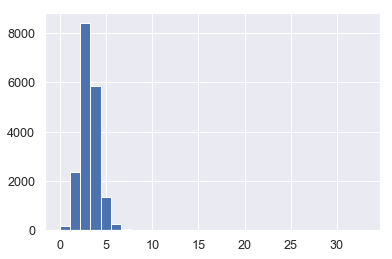

In [ ]:
# Plotando o histograma de distribuição das quantidades de quartos
df.num_bed.hist(bins=30)

In [ ]:
# Rodando uma regressão simples do LOG do preço das casas pelo número de quartos
function2 = '''
np.log1p(price) ~ num_bed 
'''

model2 = smf.ols(function2, df).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:        np.log1p(price)   R-squared:                       0.118
Model:                            OLS   Adj. R-squared:                  0.118
Method:                 Least Squares   F-statistic:                     2471.
Date:                Wed, 21 Aug 2019   Prob (F-statistic):               0.00
Time:                        23:15:04   Log-Likelihood:                -13271.
No. Observations:               18448   AIC:                         2.655e+04
Df Residuals:                   18446   BIC:                         2.656e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.3937      0.014    904.151      0.0

In [ ]:
# Rodando uma regressão simples do LOG do preço das casas pelo número de quartos
# Considerando o número de quanrtos como DUMMY temos valores extremos sem significância estatística
function2 = '''
np.log1p(price) ~ C(num_bed) 
'''

model2 = smf.ols(function2, df).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:        np.log1p(price)   R-squared:                       0.132
Model:                            OLS   Adj. R-squared:                  0.132
Method:                 Least Squares   F-statistic:                     255.2
Date:                Wed, 21 Aug 2019   Prob (F-statistic):               0.00
Time:                        23:15:45   Log-Likelihood:                -13123.
No. Observations:               18448   AIC:                         2.627e+04
Df Residuals:                   18436   BIC:                         2.636e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           12.6841      0.142  

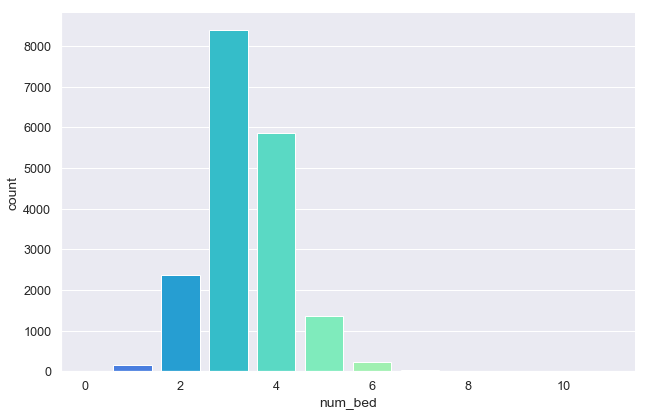

In [ ]:
# Plotando um gráfico de distribuição para o número de quartos
g = sns.factorplot(x="num_bed", data=df, kind="count",
                   palette="rainbow", size=6, aspect=1.5)
g.set_xticklabels(step=2)


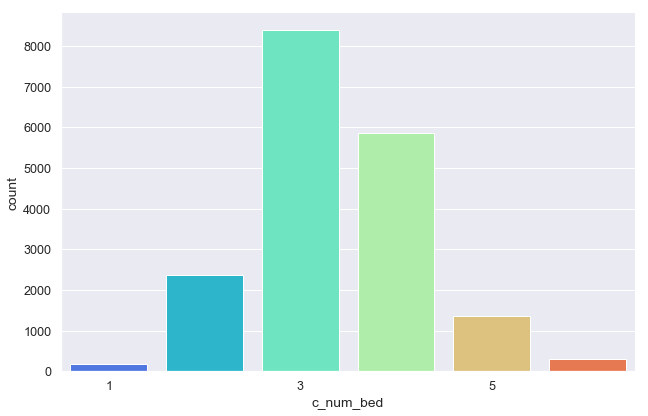

In [ ]:
# Criando uma DUMMY para o número de quartos que explique melhor o preço das casas
df['c_num_bed'] = df.num_bed.replace({ 0:1, 1:1, 2:2, 3:3, 4:4, 5:5, 6:6, 7:6, 8:6, 9:6, 10:6, 33:6})

g = sns.factorplot(x="c_num_bed", data=df, kind="count",
                   palette="rainbow", size=6, aspect=1.5)
g.set_xticklabels(step=2)

In [ ]:
# Rodando uma regressão simples do LOG do preço das casas pela DUMMY número de quartos
# Todas os números de quartos possuem estimadores estatísticamente significativos
function2 = '''
np.log1p(price) ~ C(c_num_bed) 
'''

model2 = smf.ols(function2, df).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:        np.log1p(price)   R-squared:                       0.132
Model:                            OLS   Adj. R-squared:                  0.132
Method:                 Least Squares   F-statistic:                     560.2
Date:                Wed, 21 Aug 2019   Prob (F-statistic):               0.00
Time:                        23:16:35   Log-Likelihood:                -13126.
No. Observations:               18448   AIC:                         2.626e+04
Df Residuals:                   18442   BIC:                         2.631e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            12.5877      0.03

# Mudando a forma funcional das variáveis para capturar não-lineariedades

Vamos fazer uma função para a criação de colunas QUADRÁTICAS para cada uma das colunas numéricas do DataFrame - dessa forma podemos capturar não linearidades para as variações das colunas existentes.

In [ ]:
# Imprimindo as colunas do DataFrame
list(df)

['rowid',
 'price',
 'num_bed',
 'num_bath',
 'size_house_x',
 'size_lot',
 'num_floors',
 'is_waterfront',
 'condition',
 'size_basement',
 'zip',
 'latitude',
 'longitude',
 'avg_size_neighbor_houses',
 'avg_size_neighbor_lot',
 'dummy_reforma',
 'tempo_ultima_reforma',
 'renovated?',
 'recent_year',
 'existence_year',
 'newcep',
 'size_house_y',
 'indice_invejinha',
 'log_price',
 'c_num_bath',
 'c_num_partial_bath',
 'c_num_bed']

In [ ]:
# Função que cria uma nova coluna para cada coluna original com seu valor quadrático
for coluna in list(df):
    try:
        df['q_'+str(coluna)] = df[coluna]**2
    except:
        pass

In [ ]:
# Verificando a nova lista de colunas com cada uma das variáveis
list(df)

['rowid',
 'price',
 'num_bed',
 'num_bath',
 'size_house_x',
 'size_lot',
 'num_floors',
 'is_waterfront',
 'condition',
 'size_basement',
 'zip',
 'latitude',
 'longitude',
 'avg_size_neighbor_houses',
 'avg_size_neighbor_lot',
 'dummy_reforma',
 'tempo_ultima_reforma',
 'renovated?',
 'recent_year',
 'existence_year',
 'newcep',
 'size_house_y',
 'indice_invejinha',
 'log_price',
 'c_num_bath',
 'c_num_partial_bath',
 'c_num_bed',
 'q_rowid',
 'q_price',
 'q_num_bed',
 'q_num_bath',
 'q_size_house_x',
 'q_size_lot',
 'q_num_floors',
 'q_is_waterfront',
 'q_condition',
 'q_size_basement',
 'q_zip',
 'q_latitude',
 'q_longitude',
 'q_avg_size_neighbor_houses',
 'q_avg_size_neighbor_lot',
 'q_dummy_reforma',
 'q_tempo_ultima_reforma',
 'q_renovated?',
 'q_recent_year',
 'q_existence_year',
 'q_size_house_y',
 'q_indice_invejinha',
 'q_log_price',
 'q_c_num_bath',
 'q_c_num_partial_bath',
 'q_c_num_bed']

In [ ]:
# Verificando o tamanho do DataFrame
df.shape

(18448, 53)

In [ ]:
# Verificando as colunas e os valores para cada variável
df.head()

,rowid,price,num_bed,num_bath,size_house_x,size_lot,num_floors,is_waterfront,condition,size_basement,...,q_tempo_ultima_reforma,q_renovated?,q_recent_year,q_existence_year,q_size_house_y,q_indice_invejinha,q_log_price,q_c_num_bath,q_c_num_partial_bath,q_c_num_bed
0,0,221900,3,1.00,1180,5650,1.0,0,3,0,...,9801.0,0,3822025.0,3600.0,3.041754e+06,0.457762,151.535770,1.0,0.0,9
100,100,205425,2,1.00,880,6780,1.0,0,4,0,...,9801.0,0,3783025.0,4900.0,3.041754e+06,0.254590,149.642403,1.0,0.0,4
108,108,445000,3,2.25,2100,8201,1.0,0,3,480,...,9801.0,0,3869089.0,2304.0,3.041754e+06,1.449821,169.151661,4.0,1.0,9
230,230,236000,3,1.00,1300,5898,1.0,0,3,0,...,9801.0,0,3845521.0,2916.0,3.041754e+06,0.555600,153.056272,1.0,0.0,9
237,237,170000,2,1.00,860,5265,1.0,0,3,0,...,9801.0,0,3728761.0,7056.0,3.041754e+06,0.243149,145.047328,1.0,0.0,4


In [ ]:
# Verificando as informações básicas dos dados
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18448 entries, 0 to 17970
Data columns (total 53 columns):
rowid                         18448 non-null int64
price                         18448 non-null int64
num_bed                       18448 non-null int64
num_bath                      18448 non-null float64
size_house_x                  18448 non-null int64
size_lot                      18448 non-null int64
num_floors                    18448 non-null float64
is_waterfront                 18448 non-null int64
condition                     18448 non-null int64
size_basement                 18448 non-null int64
zip                           18448 non-null int64
latitude                      18448 non-null float64
longitude                     18448 non-null float64
avg_size_neighbor_houses      18448 non-null int64
avg_size_neighbor_lot         18448 non-null int64
dummy_reforma                 18448 non-null int32
tempo_ultima_reforma          18448 non-null float64
renovated?    

In [ ]:
 # Listando todas as colunas do DataFrame
list(df.columns)

['rowid',
 'price',
 'num_bed',
 'num_bath',
 'size_house_x',
 'size_lot',
 'num_floors',
 'is_waterfront',
 'condition',
 'size_basement',
 'zip',
 'latitude',
 'longitude',
 'avg_size_neighbor_houses',
 'avg_size_neighbor_lot',
 'dummy_reforma',
 'tempo_ultima_reforma',
 'renovated?',
 'recent_year',
 'existence_year',
 'newcep',
 'size_house_y',
 'indice_invejinha',
 'log_price',
 'c_num_bath',
 'c_num_partial_bath',
 'c_num_bed',
 'q_rowid',
 'q_price',
 'q_num_bed',
 'q_num_bath',
 'q_size_house_x',
 'q_size_lot',
 'q_num_floors',
 'q_is_waterfront',
 'q_condition',
 'q_size_basement',
 'q_zip',
 'q_latitude',
 'q_longitude',
 'q_avg_size_neighbor_houses',
 'q_avg_size_neighbor_lot',
 'q_dummy_reforma',
 'q_tempo_ultima_reforma',
 'q_renovated?',
 'q_recent_year',
 'q_existence_year',
 'q_size_house_y',
 'q_indice_invejinha',
 'q_log_price',
 'q_c_num_bath',
 'q_c_num_partial_bath',
 'q_c_num_bed',
 'q_size_house']

## Rodando a regressão com as novas variáveis

In [ ]:
# Definindo uma nova função com todas as variáveis do DataFrame

function3 = ''' log_price ~ num_bed
+ num_bath
+ size_house_x
+ size_lot
+ num_floors
+ is_waterfront
+ condition
+ size_basement
+ zip
+ latitude
+ longitude
+ avg_size_neighbor_houses
+ avg_size_neighbor_lot
+ dummy_reforma
+ tempo_ultima_reforma
+ recent_year
+ existence_year
+ newcep
+ size_house_y
+ indice_invejinha
+ np.log1p(c_num_bath)
+ np.log1p(c_num_partial_bath)
+ c_num_bed
+ q_num_bed
+ q_num_bath
+ q_size_house_x
+ q_size_lot
+ q_num_floors
+ q_is_waterfront
+ q_condition
+ q_size_basement
+ q_zip
+ C(zip)
+ q_latitude
+ q_longitude
+ q_avg_size_neighbor_houses
+ q_avg_size_neighbor_lot
+ q_dummy_reforma
+ q_tempo_ultima_reforma
+ q_recent_year
+ q_existence_year
+ q_size_house_y
+ q_indice_invejinha
+ np.log1p(q_c_num_bath)
+ np.log1p(q_c_num_partial_bath)
+ q_c_num_bed

'''

In [ ]:
# Rodando uma regressão com todas a variáveis do DataFrame
model3 = smf.ols(function3, df).fit()
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     1224.
Date:                Wed, 21 Aug 2019   Prob (F-statistic):               0.00
Time:                        23:30:52   Log-Likelihood:                 4603.5
No. Observations:               18448   AIC:                            -8999.
Df Residuals:                   18344   BIC:                            -8185.
Df Model:                         103                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

## Explorando a influência do tamanho das casas na composição do preço

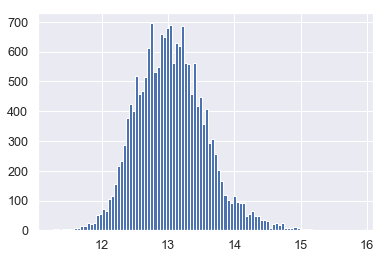

In [ ]:
# Plotando o histograma de distribuição do LOG do preço das casas
np.log1p(df['price']).hist(bins=100)

In [ ]:
# Rodando uma regressão do LOG preço das casas pelo tamanho das casas e da sua quadrática 
function4 = '''
np.log1p(price) ~  size_house_x + q_size_house_x'''

model4 = smf.ols(function4, df).fit()
print(model4.summary2())

                  Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.491     
Dependent Variable: np.log1p(price)  AIC:                16394.7522
Date:               2019-08-21 23:32 BIC:                16418.2204
No. Observations:   18448            Log-Likelihood:     -8194.4   
Df Model:           2                F-statistic:        8911.     
Df Residuals:       18445            Prob (F-statistic): 0.00      
R-squared:          0.491            Scale:              0.14237   
-------------------------------------------------------------------
                   Coef.  Std.Err.     t     P>|t|   [0.025  0.975]
-------------------------------------------------------------------
Intercept         12.1142   0.0113 1069.6569 0.0000 12.0920 12.1364
size_house_x       0.0005   0.0000   58.1680 0.0000  0.0005  0.0005
q_size_house_x    -0.0000   0.0000  -11.1451 0.0000 -0.0000 -0.0000
------------------------------------------------------------------

## Analisando a variáriel de número de pisos

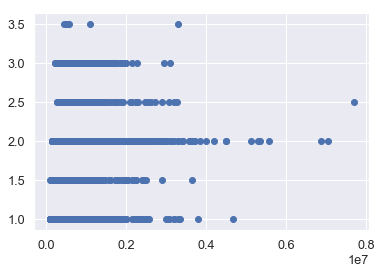

In [ ]:
# Plotando um gráfico de dispersão do preço das casas pelo número de pisos
plt.scatter(df.price,df.num_floors)

In [ ]:
# Contagem da quantidade de casas pelo número de pisos
df['num_floors'].value_counts()

1.0    9124
2.0    7030
1.5    1617
3.0     525
2.5     144
3.5       8
Name: num_floors, dtype: int64

## Criando uma variável índice para os dormitórios em relação ao número de pisos

In [ ]:
# Criando uma taxa para o número de quartos por piso
df['indice_beds'] = df['num_bed']/df['num_floors']

In [ ]:
# Rodando uma regressão do preço com o número de banheiros, tamanho, tamanho do lote, pisos e índice de quartos
function5 = ''' price ~ num_bed
+ num_bath
+ size_house_x
+ size_lot
+ num_floors
+ indice_beds
'''

model5 = smf.ols(formula=function5, data=df).fit()
print(model5.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.513
Model:                            OLS   Adj. R-squared:                  0.513
Method:                 Least Squares   F-statistic:                     3243.
Date:                Thu, 22 Aug 2019   Prob (F-statistic):               0.00
Time:                        00:26:13   Log-Likelihood:            -2.5616e+05
No. Observations:               18448   AIC:                         5.123e+05
Df Residuals:                   18441   BIC:                         5.124e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     7.195e+04   1.62e+04      4.449   

In [ ]:
# Criando uma variável cúbica do número de pisos para obtenção de significância estatísitica
df['cubic_num_floors'] = df['num_floors']**3
df['cubic_indice_beds'] = df['num_bed']/df['cubic_num_floors']

In [ ]:
# Rodando uma regressão do preço com 
# o número de banheiros, tamanho, tamanho do lote, pisos ao cubo e índice de quartos com pisos ao cubo
function5 = ''' price ~ num_bed
+ num_bath
+ size_house_x
+ size_lot
+ num_floors
+ indice_beds
+ cubic_num_floors
+ cubic_indice_beds
'''

model5 = smf.ols(formula=function5, data=df).fit()
print(model5.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.522
Model:                            OLS   Adj. R-squared:                  0.522
Method:                 Least Squares   F-statistic:                     2521.
Date:                Thu, 22 Aug 2019   Prob (F-statistic):               0.00
Time:                        00:27:35   Log-Likelihood:            -2.5599e+05
No. Observations:               18448   AIC:                         5.120e+05
Df Residuals:                   18439   BIC:                         5.121e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          4.786e+05   2.94e+0

## Verificando as correlações com o LOG dos preços

In [ ]:
# Verificando a correlação de todas as variáveis em relação ao LOG do preço das casas
corr = df.corr()
corr.sort_values(["log_price"], ascending = False, inplace = True)
print(corr.log_price)

log_price                     1.000000
q_log_price                   0.999499
price                         0.890145
size_house_x                  0.698558
q_size_house_x                0.630962
q_size_house                  0.630962
avg_size_neighbor_houses      0.620393
q_avg_size_neighbor_houses    0.603375
num_bath                      0.554665
q_price                       0.550330
q_num_bath                    0.546799
indice_invejinha              0.540800
c_num_bath                    0.513889
q_c_num_bath                  0.510501
q_indice_invejinha            0.505684
q_size_house_y                0.493140
size_house_y                  0.485748
latitude                      0.451091
q_latitude                    0.450791
c_num_bed                     0.354855
q_c_num_bed                   0.347253
num_bed                       0.343714
q_size_basement               0.322719
size_basement                 0.317714
num_floors                    0.313108
q_num_floors             

# Realizando Predições

Agora vamos utilizar o o modelo OLS (Ordinary Least Squares) utilizado anteriormente para análise, para fazer predições dos preços das casas, e depois analisar estes preços preditos e principalmente como o erro gerado (Valor Real menos o Valor Predito) se comporta.

In [ ]:
# Utilizando o ajuste do último modelo para realizar predições para o preço das casas
model5.predict()

array([ 267556.74686569,  250677.71808586,  586244.91290905, ...,
       1141250.33541985,  929370.59939106, 1471360.95937422])

In [ ]:
# Criando uma coluna no DataFrmae com o valores preditos para o preço das casas
df['yhat'] = model5.predict()

In [ ]:
# Verificando a correlação dos valores reais com os valores preditos dos preços das casas
df[['yhat', 'price']].corr()

,yhat,price
yhat,1.000000,0.722766
price,0.722766,1.000000


In [ ]:
# Calculando a raiz quadrada do R_Quadrado da regressão 
# para comparação com a correlação entre os valores reais e os valores preditos
np.sqrt(model5.rsquared)

0.7227664763345621

In [ ]:
# Criando uma coluna no DataFrame com so valores dos ERROS
df['erro'] = df['yhat'] - df['price']

In [ ]:
# Calculando a média dos erros quadráticos e o R_Quadrado pelo Sklearn
# entre valores reais e os valores preditos do preço das casas
from sklearn import metrics
mean_squared_error(df.price, df.yhat), r2_score(df.price, df.yhat)

(66094612372.438934, 0.5223913793130792)

In [ ]:
# Calculando a raiz da média dos erros quadráticos
np.sqrt(mean_squared_error(df.price, df.yhat))

257088.72470888126

# Analisando o erro

"O dinheiro está no residuo" M. Silva - isto significa que as melhores oportunidades estarão nas casas com menor preço real de venda mas com mais alto valor predito.

Além disso, temos que lembrar que o erro deve ter distribuição normal.

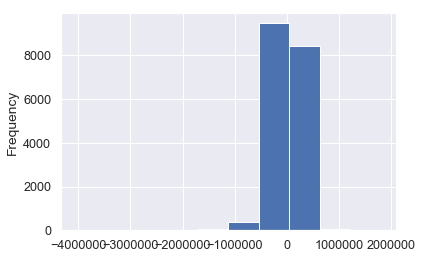

In [ ]:
# Plotando o histograma da distrobuição dos erros para verificar se é NORMAL
df['erro'].plot.hist()

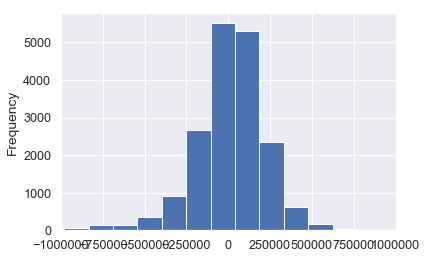

In [ ]:
# Plotando o mesmo histograma dos ERROS com parametrização (Normal)
df['erro'].plot.hist(bins=40, xlim = (-1000000, 1000000))

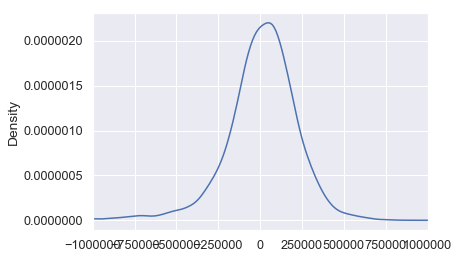

In [ ]:
# Plotando a curva densidade de probabilidade dos ERROS (Normal)
df['erro'].plot.kde(xlim = (-1000000, 1000000) )

## Padornizando o Erro

Dividindo os valores de erro pelo desvio padrão do próprio erro faz o que chamamos de Normalização dos valores do erro, para entendermos quantos desvios padrão estamos afastados do valor médio. Para os erros, o valor médio sempre será zero.

In [ ]:
#  Calculando a média dos ERROS
df['erro'].mean()

-3.701911315140989e-07

In [ ]:
# Criando uma coluna dos ERROS Padronizados pela divisão dos ERROS pelo desvio-padrão
df['erro_em_desvios'] = df['erro']/df['erro'].std()

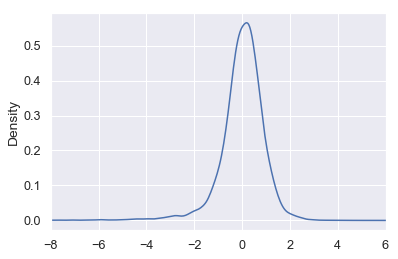

In [ ]:
# Plotando uma curva densidade de probabilidade dos ERROS Padronizados
df['erro_em_desvios'].plot.kde(xlim = (-8, 6) )

# Removendo outliers da predição usando probabilidade

Podemos identificar que temos muitos valores extremos na distribuição dos erros, o que causa muita imprecisão. A estratégia de tratamento é a remoção destes Outliers. Vamos começar criando uma máscara para remover os outliers com dois desvios-padrão de distância, e identificar quantos valores serão removidos.

In [ ]:
# Criando uma máscara para fitrar as casas pelo critério de 2 desvios-padrão da média dos ERROS
mascara_prob = (df['erro_em_desvios']<1.96) & (df['erro_em_desvios']>-1.96)

In [ ]:
# Verificando o tamanho do DataFrame original
df.shape

(18448, 60)

In [ ]:
# Veirficando o tamanho dos valores removidos
df[~mascara_prob].shape

(751, 60)

In [ ]:
# Verificando o tamanho do DataFrmae filtrado
df[mascara_prob].shape

(17697, 60)

In [ ]:
# Calculando a porcentagem dos valores remodidos com 2 desvios-padrão da média dos ERROS Padrão
df[mascara_prob].shape[0]/df.shape[0]

0.9592909800520382

A remoção de valores com dois desvios-padrão da média parece muito agressivo, pois estaremos eliminando cerca de 4% da amostra. Isso pode enviesar nossos dados. Por isso, vamos identificar quantos valores removemos se adoratmos uma estratégia de 6 sigma de nível de confiança.

In [ ]:
# Criando uma máscara para os valores de 6 desvios-padrão da média dos ERROS Padronizados
mascara_raridade_9999 = (df['erro_em_desvios']<6) & (df['erro_em_desvios']>-6)

In [ ]:
# Verificando o número de casas removidas
df[~mascara_raridade_9999].shape[0]

49

Esta estratégia 6 sigma nos permite retirar cerca de 48 valores extremos do modelo - agora sim seguimos em frente com a nova regressão.

In [ ]:
# Rodando uma regressão com a estratégia 6 sigma de remoção de outliers
# Regressão do preço das casas com o número de quartos, banheiros, tamnho da casa, tamanho do lote, número de pisos
function6 = ''' price ~ num_bed
+ num_bath
+ size_house_x
+ size_lot
+ num_floors
'''

model6 = smf.ols(function6, df[mascara_raridade_9999]).fit()
print(model6.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.505
Model:                            OLS   Adj. R-squared:                  0.505
Method:                 Least Squares   F-statistic:                     3748.
Date:                Thu, 22 Aug 2019   Prob (F-statistic):               0.00
Time:                        00:10:01   Log-Likelihood:            -2.5343e+05
No. Observations:               18399   AIC:                         5.069e+05
Df Residuals:                   18393   BIC:                         5.069e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     9.575e+04   7643.581     12.527   

# Analisando a DUMMY número de banheiros através de uma regressão

Podemos observar cada linha vermelha representando os valores preditos para cada número de banheiros

                          Results: Ordinary least squares
Model:                   OLS                   Adj. R-squared:          0.523      
Dependent Variable:      price                 AIC:                     511939.7381
Date:                    2019-08-22 00:15      BIC:                     511994.4971
No. Observations:        18448                 Log-Likelihood:          -2.5596e+05
Df Model:                6                     F-statistic:             3378.      
Df Residuals:            18441                 Prob (F-statistic):      0.00       
R-squared:               0.524                 Scale:                   6.5950e+10 
-----------------------------------------------------------------------------------
                        Coef.     Std.Err.     t    P>|t|     [0.025       0.975]  
-----------------------------------------------------------------------------------
Intercept             32668.3084 31519.5742  1.0364 0.3000  -29112.9769  94449.5936
C(c_num_bath)[T.1.

Text(0.5,1,'Linear Regression')

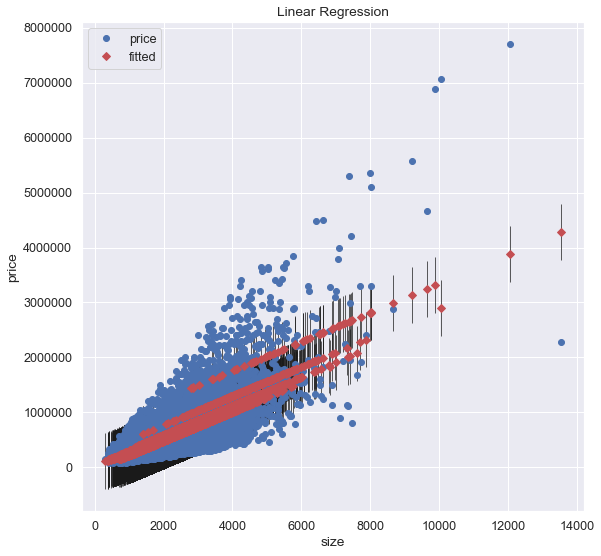

In [ ]:
# Rodando uma regressão dos preços das casas pelo tamanho e número de banheiros dummyzada
function7 = ''' price ~ size_house_x + C(c_num_bath)
'''

model7 = smf.ols(function7, df).fit()
print(model7.summary2())

# Plotando um gráfico da regressão com os valores reais e ajustados dos preços das casas
# É possível visualizar os diferentes ajustes para cada uma das DUMMIES do número de banheiros
import matplotlib.pyplot as plt
import statsmodels.api as sm

plt.rcParams['figure.figsize'] = (9,9)

fig, ax = plt.subplots()
fig = sm.graphics.plot_fit(model7, 6, ax=ax) # o parâmetro 6 é o índice da variável do modelo (size_house_x)
ax.set_ylabel("price")
ax.set_xlabel("size")
ax.set_title("Linear Regression")

# Adicionando ITERAÇÃO entre as variáveis parar capturar diferenças nas taxas de retorno

Vamos iteragir as varáveis is_waterfront com o size_house_x com multiplicação para geraar novas predições

In [ ]:
# Descrição das estatísticas básicas da variável is_waterfront
df.is_waterfront.describe()

count    18448.000000
mean         0.007643
std          0.087092
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: is_waterfront, dtype: float64

In [ ]:
# Criando uma variável com a multiplicação do tamanho das cadas pela variável is_waterfront
df['size_x_waterfront'] = df['size_house_x'] * df['is_waterfront']

In [ ]:
# Rodando uma regressão do LOG do preço das casas pelo tamanho, is_waterfront e a multiplicação dos dois
function8 = ''' log_price ~ size_house_x + is_waterfront + size_x_waterfront'''

model8 = smf.ols(function8, df).fit()
print(model8.summary2())

                  Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.499     
Dependent Variable: log_price        AIC:                16126.7469
Date:               2019-08-22 00:19 BIC:                16158.0378
No. Observations:   18448            Log-Likelihood:     -8059.4   
Df Model:           3                F-statistic:        6119.     
Df Residuals:       18444            Prob (F-statistic): 0.00      
R-squared:          0.499            Scale:              0.14031   
-------------------------------------------------------------------
                   Coef.  Std.Err.     t     P>|t|   [0.025  0.975]
-------------------------------------------------------------------
Intercept         12.2204   0.0069 1769.6304 0.0000 12.2068 12.2339
size_house_x       0.0004   0.0000  129.8690 0.0000  0.0004  0.0004
is_waterfront      0.8323   0.0710   11.7186 0.0000  0.6931  0.9715
size_x_waterfront -0.0001   0.0000   -3.2287 0.0012 -0.0001 -0.000

Text(0.5,1,'Linear Regression')

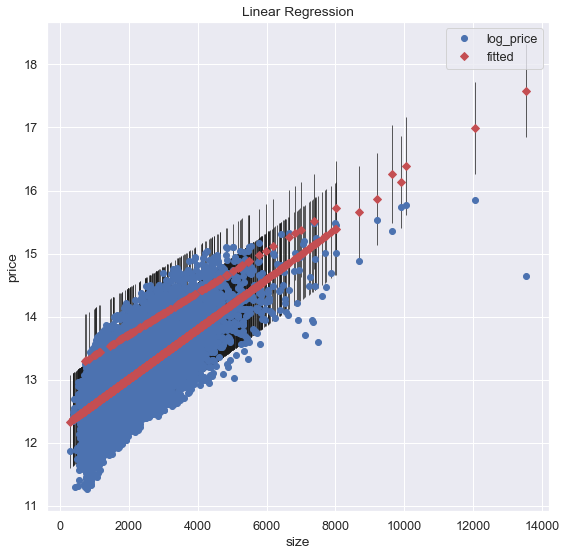

In [ ]:
# Plotando uma dispersão do tamanho das casas pelo preço 
# com o ajuste dos valores que permite ver a DUMMY is_waterfront
fig, ax = plt.subplots()
fig = sm.graphics.plot_fit(model8, 1, ax=ax)
ax.set_ylabel("price")
ax.set_xlabel("size")
ax.set_title("Linear Regression")

# Requisitos da regressão

## Teste de normalidade do erro


In [ ]:
# Listando todas as colunas do DataFrame
list(df.columns)

['rowid',
 'price',
 'num_bed',
 'num_bath',
 'size_house_x',
 'size_lot',
 'num_floors',
 'is_waterfront',
 'condition',
 'size_basement',
 'zip',
 'latitude',
 'longitude',
 'avg_size_neighbor_houses',
 'avg_size_neighbor_lot',
 'dummy_reforma',
 'tempo_ultima_reforma',
 'renovated?',
 'recent_year',
 'existence_year',
 'newcep',
 'size_house_y',
 'indice_invejinha',
 'log_price',
 'c_num_bath',
 'c_num_partial_bath',
 'c_num_bed',
 'q_rowid',
 'q_price',
 'q_num_bed',
 'q_num_bath',
 'q_size_house_x',
 'q_size_lot',
 'q_num_floors',
 'q_is_waterfront',
 'q_condition',
 'q_size_basement',
 'q_zip',
 'q_latitude',
 'q_longitude',
 'q_avg_size_neighbor_houses',
 'q_avg_size_neighbor_lot',
 'q_dummy_reforma',
 'q_tempo_ultima_reforma',
 'q_renovated?',
 'q_recent_year',
 'q_existence_year',
 'q_size_house_y',
 'q_indice_invejinha',
 'q_log_price',
 'q_c_num_bath',
 'q_c_num_partial_bath',
 'q_c_num_bed',
 'q_size_house',
 'cubic_num_floors',
 'indice_beds',
 'cubic_indice_beds',
 'yhat'

In [ ]:
# Regressão múltipla definido por uma função 9

function9 = '''
np.log1p(price) ~ size_house_x
+ avg_size_neighbor_lot 
+ tempo_ultima_reforma
+ existence_year
+ size_basement
+ newcep
'''

model9 = smf.ols(function9, df).fit()
print(model9.summary())

                            OLS Regression Results                            
Dep. Variable:        np.log1p(price)   R-squared:                       0.599
Model:                            OLS   Adj. R-squared:                  0.599
Method:                 Least Squares   F-statistic:                     1197.
Date:                Thu, 22 Aug 2019   Prob (F-statistic):               0.00
Time:                        10:37:07   Log-Likelihood:                -6000.0
No. Observations:               18448   AIC:                         1.205e+04
Df Residuals:                   18424   BIC:                         1.224e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                12.31

In [ ]:
# Criando uma lista zipada com o LOG sos valores preditos e dos valores reais
results = list(zip(model9.predict(),df['log_price'].values))

In [ ]:
# Criando um DataFrame com o LOG dos valores predidos, reais e os resíduos
results = pd.DataFrame(results, columns=['yhat', 'y'])
results['residuo'] = model9.resid

In [ ]:
results.reset_index(inplace=True)

In [ ]:
# Verificando os valores do DataFrame results
results.head()

,index,yhat,y,residuo
0,0,12.578830,12.309987,-0.268843
1,1,12.455443,12.232841,-0.359503
2,2,12.939324,13.005832,-0.267560
3,3,12.626454,12.371591,0.287349
4,4,12.462313,12.043560,0.217188


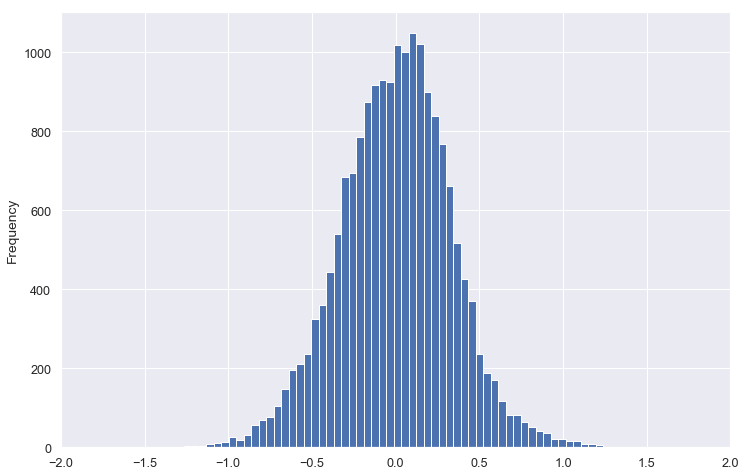

In [ ]:
# Verificando o histograma de distribuição dos ERROS para o modelo 9 (Normal)
model9.resid.plot.hist(figsize=(12,8), bins=100, xlim=(-2,2))

In [ ]:
# Fazendo o teste de Norlmalidade do ERRO com Shapiro 
# p_value < 0.05 -> rejeitamos a hipótese que é uma distribuição normal

t,p=stats.shapiro(results["residuo"])

print("The Shapiro-test of normality for residuals is {:03.3f} and p-value of {:03.3f}".format(t,p))

The Shapiro-test of normality for residuals is 0.996 and p-value of 0.000


Como p_valor<0.05 rejeita-se a hipótese dos resíduos terem distribuição normal.

Na análise de resíduo, diferença entre o valor predito e o valor y teste, nota-se que ela está distribuida aleatoriamente, indicando distribuição normal dos resultados e assim, pode-se dizer que o modelo possui poder explicativo satisfatório. No entanto, o teste de Shapiro rejeita a hipótese de normalidade dos resíduos. Dessa forma, ainda que o modelo apresente pontuação razoavelmente alto de 84~85, ainda há pontos para serem melhorados afim de melhorar a distribuicao residual.


## Teste de HOMOCESASTICIDADE 

Gráfico dos valores preditos pelo erro para verificar se existe alguma tendência e retificar que os erros tem variância constante

The Shapiro-test of normality for residuals is 0.996 and p-value of 0.000


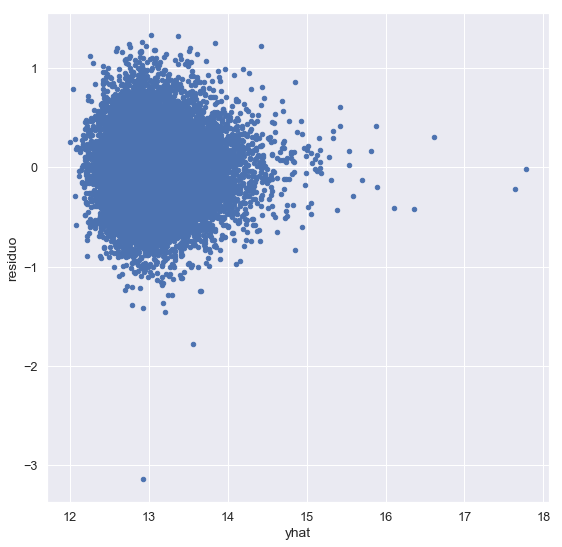

In [ ]:
# Plotando uma dispersão dos valores preditos pelos resíduos
plt.rcParams['figure.figsize'] = (9,9)

results["residuo2"] = results["y"] - results["yhat"]
results.plot(x = "yhat", y = "residuo",kind = "scatter")



## Teste de ENDOGENEIDADE 

Significa que os erros são aleatórios - não existe correlação do erro com a variável target. Tambe'm é chamado de viés da vairável omitida

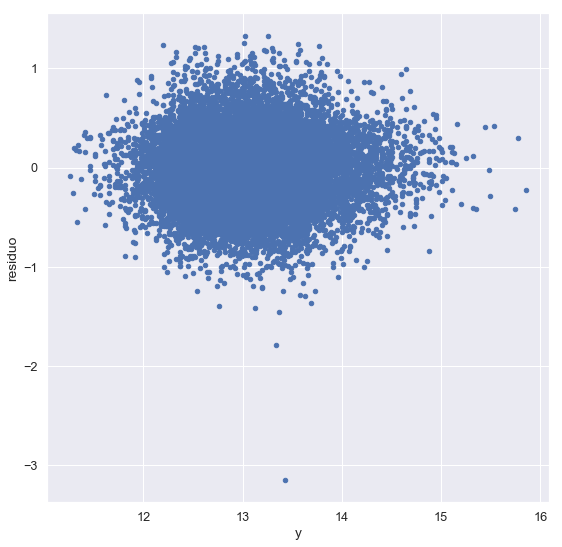

In [ ]:
results.plot(x = "y", y = "residuo",kind = "scatter")

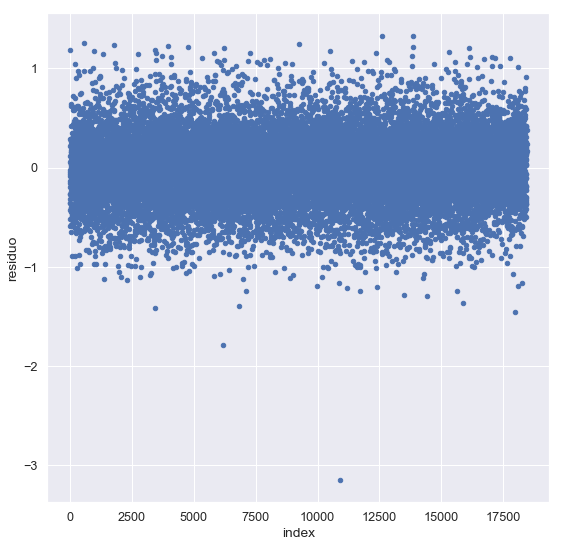

In [ ]:
results.plot(x = 'index', y = "residuo",kind = "scatter")

## Testando a qualidade do modelo através do gráfico de dispersão de valores reais pelos valores preditos

A tendência deve revelar a explicabilidade do modelo e o seu R_quadrado

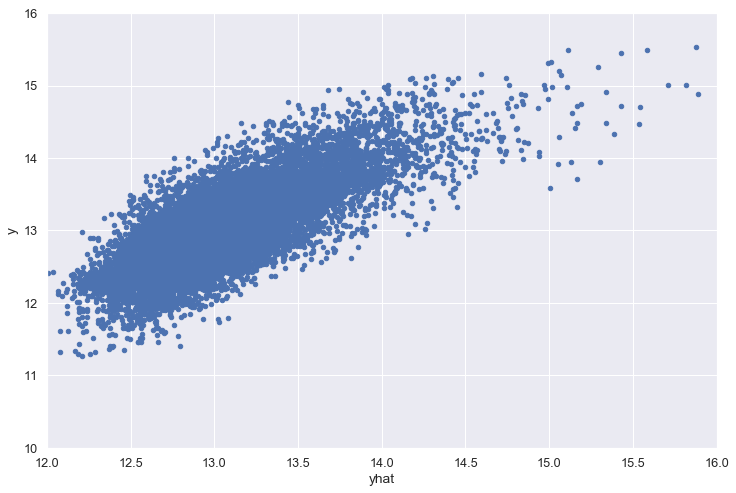

In [ ]:
pd.DataFrame(results, columns=['yhat', 'y']).plot.scatter(x='yhat', 
                                                          y='y', 
                                                          figsize=(12,8), 
                                                          xlim=(12,16), 
                                                          ylim=(10,16))

In [ ]:
# Cálculo da correlação entre os valores reais e os valores preditos
np.corrcoef(x=results.y, y=results.yhat)[0,1]**2

0.599086225312798